### Trying out h5py to read in HDF5 file

In [1]:
import h5py as h5  #importing, make sure the kernel is correct or the module will be unknown
import pandas as pd
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
# usually the recommended one that is part of the cluster

/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <

#### Analyzing Larger Output

In [2]:
# reading in the HDF5 file - this file is the AIS file that we should expect many WDs in
pathToWDWD_LG_H5 = '/mnt/home/msantiago/ceph/data/COMPAS_Output_LG_1e8.h5' #path of the hdf5 file

Data_WD_LG = h5.File(pathToWDWD_LG_H5)

In [4]:
list(Data_WD_LG.keys()) #looking at the keys (the information that can be gathered from this run)

['BSE_Common_Envelopes',
 'BSE_Double_Compact_Objects',
 'BSE_Pulsar_Evolution',
 'BSE_RLOF',
 'BSE_Supernovae',
 'BSE_System_Parameters',
 'Run_Details']

In [5]:
SNs = Data_WD_LG['BSE_Supernovae'] #specifically looking at the supernovae events
list(SNs.keys()) #listing the parameters recorded for each supernova

['Applied_Kick_Magnitude(SN)',
 'ComponentSpeed(CP)',
 'ComponentSpeed(SN)',
 'Drawn_Kick_Magnitude(SN)',
 'Eccentricity',
 'Eccentricity<SN',
 'Experienced_RLOF(SN)',
 'Fallback_Fraction(SN)',
 'Is_Hydrogen_Poor(SN)',
 'Kick_Magnitude(uK)',
 'Luminosity(CP)',
 'Luminosity(SN)',
 'MT_Donor_Hist(SN)',
 'Mass(CP)',
 'Mass(SN)',
 'Mass@ZAMS(CP)',
 'Mass@ZAMS(SN)',
 'Mass_CO_Core@CO(SN)',
 'Mass_Core@CO(SN)',
 'Mass_He_Core@CO(SN)',
 'Mass_Total@CO(SN)',
 'Metallicity@ZAMS(1)',
 'Orb_Velocity<SN',
 'Radius(CP)',
 'Radius(SN)',
 'Record_Type',
 'SEED',
 'SN_Kick_Mean_Anomaly(SN)',
 'SN_Kick_Phi(SN)',
 'SN_Kick_Theta(SN)',
 'SN_Orbit_Inclination_Angle',
 'SN_Type(SN)',
 'SemiMajorAxis',
 'SemiMajorAxis<SN',
 'Stellar_Type(CP)',
 'Stellar_Type(SN)',
 'Stellar_Type_Prev(SN)',
 'Supernova_State',
 'SystemicSpeed',
 'Teff(CP)',
 'Teff(SN)',
 'Time',
 'Unbound']

In [6]:
# looking for the actual list of supernovae types 
super_types = SNs['SN_Type(SN)'][()]
print(super_types.shape) #seeing how many different instances of this show up

# we can loop through each supernova to determine which event took place

# setting what I will make the counters equal to zero
NONE = 0
CCSN = 0
ECSN = 0
PISN = 0
PPISN = 0
USSN = 0
AIC =0
SNIA = 0
HeSD = 0

#looping through the supernova events and adding to the counters for each occurence

for super in super_types:
    if super==0:
        NONE+=1
    elif super==1:
        CCSN+=1
    elif super==2:
        ECSN+=1
    elif super==4:
        PISN+=1
    elif super==8:
        PPISN+=1
    elif super==16:
        USSN+=1
    elif super==32:
        AIC+=1
    elif super==64:
        SNIA+=1
    elif super==128:
        HeSD+=1

#printing the final number of each type of supernova

print("NONE=",NONE)
print("CCSN=",CCSN)
print("ECSN=",ECSN)
print("PISN=",PISN)
print("PPISN=",PPISN)
print("USSN=",USSN)
print("AIC=",AIC)
print("SNIA=",SNIA)
print("HeSD=",HeSD)


(6275268,)
NONE= 0
CCSN= 5888846
ECSN= 143230
PISN= 3528
PPISN= 91972
USSN= 147692
AIC= 0
SNIA= 0
HeSD= 0


#### Analyzing the Larger Mass Output (N1e7_Fiducial_AllDCO_AIS Output)

In [2]:
pathTo_LM_H5 = '/mnt/home/msantiago/ceph/data/COMPAS_Output_Large.h5' #path of the hdf5 file

Data_1 = h5.File(pathTo_LM_H5)

In [33]:
list(Data_1.keys()) #looking at the keys (the information that can be gathered from this run)

TypeError: Not a location id (invalid location ID)

In [32]:
SNs = Data_1['BSE_Supernovae'] #specifically looking at the supernovae events
list(SNs.keys()) #listing the parameters recorded for each supernova

ValueError: Not a location (invalid location ID)

I can look for the supernova types by look at the parameter "SN_Type(SN)" and following this code:
NONE
= 0
CCSN
= 1
ECSN
= 2
PISN
= 4
PPISN
= 8
USSN
= 16
AIC
= 32
SNIA
= 64
HeSD
= 128

The acronyms stand for: <br>
NONE = "No Supernova" <br>
CCSN = "Core Collapse Supernova" <br>
ECSN = "Electron Capture Supernova" <br>
PISN = "Pair Instability Supernova" <br>
PPISN = "Pulsational Pair Instability Supernova" <br>
USSN = "Ultra Stripped Supernova" <br>
AIC = "Accretion-Induced Collapse" <br>
SNIA = "Supernova Type Ia" <br>
HeSD = "Helium-shell detonation" <br>


This information was obtained from: https://compas.readthedocs.io/en/latest/pages/User%20guide/COMPAS%20output/standard-logfiles-record-specification-stellar.html#stellar-props-s

What each acronym stands for can be seen in: https://compas.readthedocs.io/en/latest/pages/User%20guide/COMPAS%20output/standard-logfiles-record-specification-stellar.html#supernova-events-states

In [13]:
# looking for the actual list of supernovae types 
super_types = SNs['SN_Type(SN)'][()]
print(super_types.shape) #seeing how many different instances of this show up

# we can loop through each supernova to determine which event took place

# setting what I will make the counters equal to zero
NONE = 0
CCSN = 0
ECSN = 0
PISN = 0
PPISN = 0
USSN = 0
AIC =0
SNIA = 0
HeSD = 0

#looping through the supernova events and adding to the counters for each occurence

for super in super_types:
    if super==0:
        NONE+=1
    elif super==1:
        CCSN+=1
    elif super==2:
        ECSN+=1
    elif super==4:
        PISN+=1
    elif super==8:
        PPISN+=1
    elif super==16:
        USSN+=1
    elif super==32:
        AIC+=1
    elif super==64:
        SNIA+=1
    elif super==128:
        HeSD+=1

#printing the final number of each type of supernova

print("NONE=",NONE)
print("CCSN=",CCSN)
print("ECSN=",ECSN)
print("PISN=",PISN)
print("PPISN=",PPISN)
print("USSN=",USSN)
print("AIC=",AIC)
print("SNIA=",SNIA)
print("HeSD=",HeSD)


(10497300,)
NONE= 0
CCSN= 9825267
ECSN= 310416
PISN= 4289
PPISN= 82712
USSN= 270053
AIC= 4563
SNIA= 0
HeSD= 0


In [14]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'The Current Supernova Types of Different Seeds')

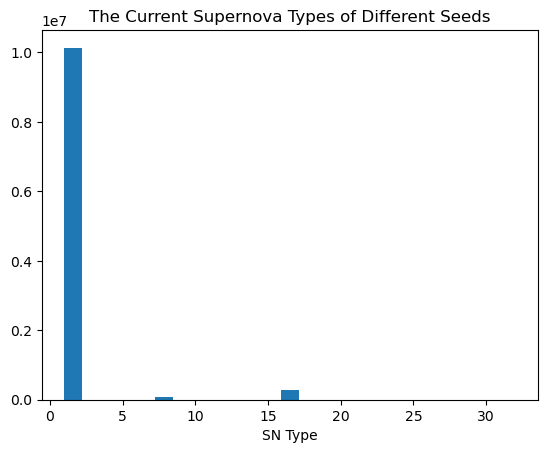

In [15]:
super_types_array = np.array(super_types)
# print(super_types_array[0:30])
plt.hist(super_types_array, bins='auto');
plt.xlabel("SN Type")
plt.title("The Current Supernova Types of Different Seeds")

In [16]:
# this may be silly but this is to be able to label each type of sn type using the legend

# making empty lists to hold each type
sn_0 = []
sn_1 = []
sn_2 = []
sn_4 = []
sn_8 = []
sn_16 = []
sn_32 = []
sn_64 = []
sn_128 = []

# looping through all of the seeds
for s in super_types_array:

# specifying the case for each type

    if s==0:
        sn_0.append(s)

    if s==1:
        sn_1.append(s)

    if s==2:
        sn_2.append(s)

    if s==4:
        sn_4.append(s)

    if s==8:
        sn_8.append(s)

    if s==16:
        sn_16.append(s)

    if s==32:
        sn_32.append(s)

    if s==64:
        sn_64.append(s)

    if s==128:
        sn_128.append(s)


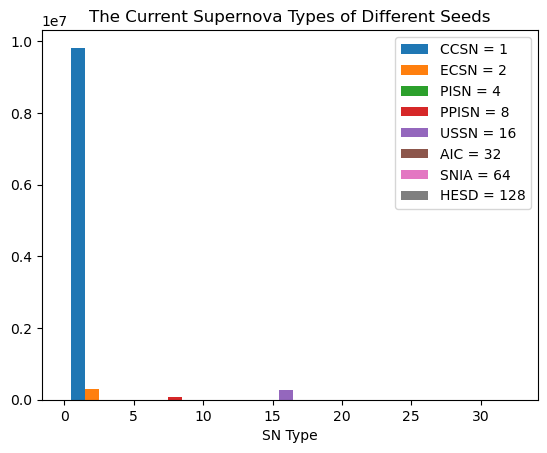

In [17]:
plt.hist(sn_1, bins='auto', label="CCSN = 1");
plt.hist(sn_2, bins='auto', label="ECSN = 2");
plt.hist(sn_4, bins='auto', label="PISN = 4");
plt.hist(sn_8, bins='auto', label="PPISN = 8");
plt.hist(sn_16, bins='auto', label="USSN = 16");
plt.hist(sn_32, bins='auto', label="AIC = 32");
plt.hist(sn_64, bins='auto', label="SNIA = 64");
plt.hist(sn_128, bins='auto', label="HESD = 128");
plt.xlabel("SN Type")
plt.title("The Current Supernova Types of Different Seeds")
plt.legend()

In [6]:
# trying to import the compas function to see the hdf5 file as a dataset 
#from compasUtils import printCompasDetails, getEventHistory, getEventStrings

In [3]:
#closing out the file
Data_1.close()

#### Analyzing the Low Mass Output

In [2]:
pathToSM_H5 = '/mnt/home/msantiago/ceph/data/COMPAS_Output_LowMass.h5' #path of the hdf5 file

Data_2 = h5.File(pathToSM_H5)

In [5]:
list(Data_2.keys()) #looking at the keys (the information that can be gathered from this run)

['BSE_Common_Envelopes',
 'BSE_Double_Compact_Objects',
 'BSE_Pulsar_Evolution',
 'BSE_RLOF',
 'BSE_Supernovae',
 'BSE_System_Parameters',
 'Run_Details']

In [3]:
SNs_2 = Data_2['BSE_Supernovae'] #specifically looking at the supernovae events
list(SNs_2.keys()) #listing the parameters recorded for each supernova

['Applied_Kick_Magnitude(SN)',
 'ComponentSpeed(CP)',
 'ComponentSpeed(SN)',
 'Drawn_Kick_Magnitude(SN)',
 'Eccentricity',
 'Eccentricity<SN',
 'Experienced_RLOF(SN)',
 'Fallback_Fraction(SN)',
 'Is_Hydrogen_Poor(SN)',
 'Kick_Magnitude(uK)',
 'Luminosity(CP)',
 'Luminosity(SN)',
 'MT_Donor_Hist(SN)',
 'Mass(CP)',
 'Mass(SN)',
 'Mass@ZAMS(CP)',
 'Mass@ZAMS(SN)',
 'Mass_CO_Core@CO(SN)',
 'Mass_Core@CO(SN)',
 'Mass_He_Core@CO(SN)',
 'Mass_Total@CO(SN)',
 'Metallicity@ZAMS(1)',
 'Orb_Velocity<SN',
 'Radius(CP)',
 'Radius(SN)',
 'Record_Type',
 'SEED',
 'SN_Kick_Mean_Anomaly(SN)',
 'SN_Kick_Phi(SN)',
 'SN_Kick_Theta(SN)',
 'SN_Orbit_Inclination_Angle',
 'SN_Type(SN)',
 'SemiMajorAxis',
 'SemiMajorAxis<SN',
 'Stellar_Type(CP)',
 'Stellar_Type(SN)',
 'Stellar_Type_Prev(SN)',
 'Supernova_State',
 'SystemicSpeed',
 'Teff(CP)',
 'Teff(SN)',
 'Time',
 'Unbound']

In [4]:
# looking for the actual list of supernovae types 
super_types_LM = SNs_2['SN_Type(SN)'][()]
print(super_types_LM.shape) #seeing how many different instances of this show up

# we can loop through each supernova to determine which event took place

# setting what I will make the counters equal to zero
NONE = 0
CCSN = 0
ECSN = 0
PISN = 0
PPISN = 0
USSN = 0
AIC =0
SNIA = 0
HeSD = 0

#looping through the supernova events and adding to the counters for each occurence

for super in super_types_LM:
    if super==0:
        NONE+=1
    elif super==1:
        CCSN+=1
    elif super==2:
        ECSN+=1
    elif super==4:
        PISN+=1
    elif super==8:
        PPISN+=1
    elif super==16:
        USSN+=1
    elif super==32:
        AIC+=1
    elif super==64:
        SNIA+=1
    elif super==128:
        HeSD+=1

#printing the final number of each type of supernova

print("NONE=",NONE)
print("CCSN=",CCSN)
print("ECSN=",ECSN)
print("PISN=",PISN)
print("PPISN=",PPISN)
print("USSN=",USSN)
print("AIC=",AIC)
print("SNIA=",SNIA)
print("HeSD=",HeSD)


(62701,)
NONE= 0
CCSN= 58769
ECSN= 1431
PISN= 33
PPISN= 953
USSN= 1515
AIC= 0
SNIA= 0
HeSD= 0


In [5]:
# this may be silly but this is to be able to label each type of sn type using the legend

super_types_LM_array = np.array(super_types_LM)

# making empty lists to hold each type
sn_0 = []
sn_1 = []
sn_2 = []
sn_4 = []
sn_8 = []
sn_16 = []
sn_32 = []
sn_64 = []
sn_128 = []

# looping through all of the seeds
for s in super_types_LM_array:

# specifying the case for each type

    if s==0:
        sn_0.append(s)

    if s==1:
        sn_1.append(s)

    if s==2:
        sn_2.append(s)

    if s==4:
        sn_4.append(s)

    if s==8:
        sn_8.append(s)

    if s==16:
        sn_16.append(s)

    if s==32:
        sn_32.append(s)

    if s==64:
        sn_64.append(s)

    if s==128:
        sn_128.append(s)


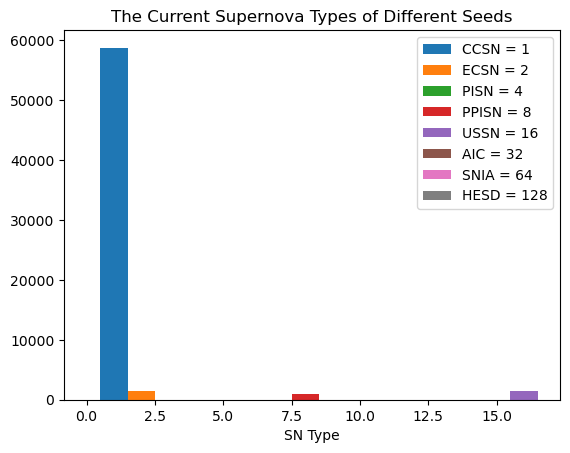

In [6]:
plt.hist(sn_1, bins='auto', label="CCSN = 1");
plt.hist(sn_2, bins='auto', label="ECSN = 2");
plt.hist(sn_4, bins='auto', label="PISN = 4");
plt.hist(sn_8, bins='auto', label="PPISN = 8");
plt.hist(sn_16, bins='auto', label="USSN = 16");
plt.hist(sn_32, bins='auto', label="AIC = 32");
plt.hist(sn_64, bins='auto', label="SNIA = 64");
plt.hist(sn_128, bins='auto', label="HESD = 128");
plt.xlabel("SN Type")
plt.title("The Current Supernova Types of Different Seeds")
plt.legend()

In [15]:
#closing out the file
# Data_2.close()

### Experimental things below

In [9]:
print(SNs['SN_Type(SN)'].attrs['units']) # attrs refers to attributes, finding the units of a paramter

b'-'


In [11]:
# trying to figure out how to list out what the acronyms stand for here rather than needing to refer to the documentation
# print(SPs['SN_Type(SN)'].attrs[])

### Using (or attempting to) use astropy to read in HDF5 file

In [100]:
# just use table to read it in
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# reading in the supernova data

# SNs_2_table = Table(SNs_2)
# SNs_2_table

In [ ]:
Systems= Data_2["BSE_System_Parameters"]
SYS = pd.Dataframe()

for key in Data_2["BSE_System_Parameters"].keys():

    SYS[key] = Data_2["BSE_System_Parameters"][key][()]

In [ ]:
display(SYS)

In [ ]:
double_WD_BOOL_11 = np.logical_and(SYS['Stellar_Type(1)']==11,SYS["Stellar_Type(2)"]==11)  
double_WD_BOOL_12 = np.logical_and(SYS['Stellar_Type(1)']==12,SYS["Stellar_Type(2)"]==12)  
double_WD_BOOL_10 = np.logical_and(SYS['Stellar_Type(1)']==10,SYS["Stellar_Type(2)"]==10)  
WD_BOOL = np.logical_or(np.logical_or(double_WD_BOOL_11,double_WD_BOOL_12),double_WD_BOOL_10)  
print(sum(WD_BOOL))  
# make better bools

In [7]:
# now looking at the roche lobe overflow (mass transfer)
RLOF_LM = Data_2['BSE_RLOF']

#reading in the data as a table to make it more readable

OG_RLOF_TABLE = Table(RLOF_LM)
OG_RLOF_TABLE

Beta,CEE>MT,Eccentricity<MT,Eccentricity>MT,Luminosity(1),Luminosity(2),MT_Event_Counter,Mass(1)<MT,Mass(1)>MT,Mass(2)<MT,Mass(2)>MT,MassTransferRateDonor,Merger,Metallicity@ZAMS(1),RLOF(1)<MT,RLOF(1)>MT,RLOF(2)<MT,RLOF(2)>MT,Radius(1)<MT,Radius(1)>MT,Radius(1)|RL<step,Radius(1)|RL>step,Radius(2)<MT,Radius(2)>MT,Radius(2)|RL<step,Radius(2)|RL>step,Record_Type,SEED,SemiMajorAxis<MT,SemiMajorAxis>MT,Stellar_Type(1)<MT,Stellar_Type(1)>MT,Stellar_Type(2)<MT,Stellar_Type(2)>MT,Teff(1),Teff(2),Time<MT,Time>MT,Zeta_Hurley(1),Zeta_Hurley(2),Zeta_Hurley_He(1),Zeta_Hurley_He(2),Zeta_Soberman(1),Zeta_Soberman(2),Zeta_Soberman_He(1),Zeta_Soberman_He(2)
float64,uint8,float64,float64,float64,float64,uint32,float64,float64,float64,float64,float64,uint8,float64,uint8,uint8,uint8,uint8,float64,float64,float64,float64,float64,float64,float64,float64,uint32,uint64,float64,float64,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
4.144522123764924e-06,0,0.0,0.0,80.43004524184563,0.10544534344111112,1,0.8256165381191641,0.4611834061044192,0.5659603850097936,0.5659618954109719,7411.9034032836,0,0.0016000636446804315,0,1,0,0,119.8053651605664,0.014853187357341783,1.0100612011390113,0.00011931842482362293,0.517722473724366,0.517723783602549,0.005186203375411369,0.003787631536416959,1,900003,287.9011339411869,344.506740495443,3,10,0,0,141978.40276805413,4575.992781789945,7680.396683252381,7680.470736834791,0.0,-0.2399478638434796,0.0,-0.2399478638434796,0.0,-0.3333333333333333,0.0,-0.3333333333333333
0.000180045289035175,1,0.0,0.0,67.4163051971626,2.4507493333311063,1,1.3733315169808418,0.4848937726466166,1.0467411699949083,1.0467411699949083,4080.076594172305,0,0.0009079700166705884,0,1,0,0,87.65831277285689,0.014464663189015473,1.0145913325543974,0.004796800284255496,0.98519032745066,0.98519032745066,0.012908825363819435,0.23008305133608165,1,900008,214.58062365855403,9.583364185251547,3,10,1,1,137662.17010910538,7283.534658538805,2136.54639388222,2136.582587655694,0.0,-0.21728187798836937,0.0,-0.21728187798836937,0.0,-0.3333333333333333,0.0,-0.3333333333333333
1.0,1,0.0,0.0,3.2077856378207976e-05,28.778335310680333,2,0.4848937726466166,0.4848937726466166,1.0457422241252674,0.20698902941172218,1.6032742342694144,1,0.0009079700166705884,0,0,0,1,0.014464663189015473,0.014464663189015473,0.004792510096679771,0.7801109381741677,4.334884520578072,0.021110763599141918,1.011908718158736,1.6776725130004575,1,900008,9.589618752748802,0.04083329383986907,10,10,3,10,3615.5528102441604,92106.86133279861,5413.907595698666,5418.29690990891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0009252797489736876,1,0.0,0.0,99.91488651384013,0.020251109767654107,1,2.1303187037123124,0.3006077560425644,0.312391552616578,0.312391552616578,6.568770491588559,1,0.00026296535139415297,0,1,0,0,4.397725494007824,4.397725494007824,1.0872762302310262,276.42577603100955,0.2943996214956937,0.2943996214956937,0.1725164371337115,18.18266730691436,1,900009,7.393770105880393,0.04235726854262641,2,2,0,0,8711.060474930167,4017.1784177061654,632.5319865951622,632.8501634316941,0.0,-0.16358038873788983,0.0,-0.16358038873788983,0.0,-0.3333333333333333,0.0,-0.3333333333333333
0.348305484526812,0,0.0,0.0,67.49519382426843,1.7395944984595237,1,1.2298067827668793,0.1467918079177086,0.8155843792005366,1.19280443476517,0.2752193037883445,0,0.01805939637061457,0,1,0,0,2.365611538176128,0.024024625236980197,1.0045683283158877,0.001622985896640856,0.7688270931935459,1.1415910160756277,0.39382203591518217,0.030154910392256026,1,900010,5.675490351845762,67.4226897456997,2,10,1,1,106848.25622501946,6210.610206694499,5126.906503744681,5140.120180300723,0.0,-0.30066038218413504,0.0,-0.30066038218413504,0.0,-0.3333333333333333,0.0,-0.3333333333333333
1.0,1,0.0,0.0,1.552906004409779e-05,155.5641078948597,2,0.1467918079177086,0.1467918079177086,1.1674503262743623,0.3383283364508429,367.0455478036649,0,0.01805939637061457,0,0,0,1,0.024024625236980197,0.0

In [42]:
# # now looking at the system paramters to se what the final stellar state of the stars were
# system_params_LM = Data_2['BSE_System_Parameters']

# #reading in the data as a table to make it more readable

# system_params_LM_table = Table(system_params_LM)
# system_params_LM_table

Let's first just look at the masses of all of the WD accretors and see if they are ever above 1.4 solar masses

In [8]:
is_WD_init_bool  =  np.logical_or(OG_RLOF_TABLE["Stellar_Type(1)<MT"] == 10, OG_RLOF_TABLE["Stellar_Type(1)<MT"] == 11, OG_RLOF_TABLE["Stellar_Type(1)<MT"] == 12)
# is_WD_final_bool  =  np.logical_or(OG_RLOF_TABLE["Stellar_Type(1)>MT"] == 10, OG_RLOF_TABLE["Stellar_Type(1)>MT"] == 11, OG_RLOF_TABLE["Stellar_Type(1)>MT"] == 12)
OG_RLOF_TABLE_WD = OG_RLOF_TABLE[is_WD_init_bool]
# OG_RLOF_TABLE_WD_final = OG_RLOF_TABLE_WD[is_WD_final_bool]
# OG_RLOF_TABLE_WD_final = OG_RLOF_TABLE[np.logical_and(is_WD_init_bool,is_WD_final_bool)]
RLOF_LM_table_1_accret = OG_RLOF_TABLE_WD[OG_RLOF_TABLE_WD["RLOF(2)>MT"]==1]

# star_1_accret_desind = np.where(RLOF_LM_table["RLOF(2)>MT"]==1) #star 2 is the donor and star 1 is the accretor


# let's look at these when star 1 is the accretor
# star_1_accret_desind = np.where(RLOF_LM_table["RLOF(2)>MT"]==1) #star 2 is the donor and star 1 is the accretor
# RLOF_LM_table_1_accret = RLOF_LM_table[star_1_accret_desind]
RLOF_LM_table_1_accret

Beta,CEE>MT,Eccentricity<MT,Eccentricity>MT,Luminosity(1),Luminosity(2),MT_Event_Counter,Mass(1)<MT,Mass(1)>MT,Mass(2)<MT,Mass(2)>MT,MassTransferRateDonor,Merger,Metallicity@ZAMS(1),RLOF(1)<MT,RLOF(1)>MT,RLOF(2)<MT,RLOF(2)>MT,Radius(1)<MT,Radius(1)>MT,Radius(1)|RL<step,Radius(1)|RL>step,Radius(2)<MT,Radius(2)>MT,Radius(2)|RL<step,Radius(2)|RL>step,Record_Type,SEED,SemiMajorAxis<MT,SemiMajorAxis>MT,Stellar_Type(1)<MT,Stellar_Type(1)>MT,Stellar_Type(2)<MT,Stellar_Type(2)>MT,Teff(1),Teff(2),Time<MT,Time>MT,Zeta_Hurley(1),Zeta_Hurley(2),Zeta_Hurley_He(1),Zeta_Hurley_He(2),Zeta_Soberman(1),Zeta_Soberman(2),Zeta_Soberman_He(1),Zeta_Soberman_He(2)
float64,uint8,float64,float64,float64,float64,uint32,float64,float64,float64,float64,float64,uint8,float64,uint8,uint8,uint8,uint8,float64,float64,float64,float64,float64,float64,float64,float64,uint32,uint64,float64,float64,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1.0,1,0.0,0.0,3.2077856378207976e-05,28.778335310680333,2,0.4848937726466166,0.4848937726466166,1.0457422241252674,0.20698902941172218,1.6032742342694144,1,0.0009079700166705884,0,0,0,1,0.014464663189015473,0.014464663189015473,0.004792510096679771,0.7801109381741677,4.334884520578072,0.021110763599141918,1.011908718158736,1.6776725130004575,1,900008,9.589618752748802,0.04083329383986907,10,10,3,10,3615.5528102441604,92106.86133279861,5413.907595698666,5418.29690990891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,1,0.0,0.0,1.552906004409779e-05,155.5641078948597,2,0.1467918079177086,0.1467918079177086,1.1674503262743623,0.3383283364508429,367.0455478036649,0,0.01805939637061457,0,0,0,1,0.024024625236980197,0.024024625236980197,0.0015824844972598619,0.043413517483411684,38.80090835187925,0.01723301516129598,1.008667681361284,0.021289716708546774,1,900010,68.72364529045993,1.7883025663108172,10,10,3,10,2340.105939545198,155444.10373934248,10654.471493186255,10654.693252880674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.1819242725908363e-17,0,0.0,0.0,2.6185956682334043e-06,24.730467530210284,2,0.8876201687585465,0.8876201687585465,1.0352744909484257,0.36791807948869976,234.6607700731949,0,0.0001475633987143172,0,0,0,1,0.009317026996987382,0.009317026996987382,0.0003952370292026298,0.00011775251948243853,25.453400266981195,0.01658916128848528,1.0064549985523445,0.0003130762607455443,1,900016,64.46453340000616,173.24944396103658,11,11,3,10,2407.9971680922476,100039.9358114858,5102.595978822963,5102.9121375683335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.7317636588519773e-22,1,0.0,0.0,0.029220508404768922,95.60199767376072,2,0.9810455335118108,0.9810455335118108,5.800472007054785,1.0956426489411404,79357.74419944645,0,0.0289321153912559,0,0,0,1,0.008271267405677104,0.008271267405677104,3.433517989644132e-05,0.00013747216669400243,539.2853032408074,0.00696127452621558,1.0052844196483148,0.00011000435778395138,1,900023,1002.6049843762789,162.87877191205507,11,11,6,11,26267.17991151445,216545.86681333347,117.94047387406353,117.94547387406352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.4244429343270145e-18,1,0.0,0.0,0.0011993069039261718,2145.606018988237,3,1.3090592487671473,1.3090592487671473,4.753591402866659,1.522356906777668,1852.8157058611882,0,0.0001647393829398977,0,0,0,1,0.004101456585457414,0.004101456585457414,0.00010720299377173505,0.01011518465169014,68.69051975853246,0.29063898705044344,1.0004643690832113,0.6690190461378616,1,900025,139.28899788780603,1.1080725449094813,11,11,4,7,16789.627526126988,72943.75171203354,112.91955037926353,112.94285970099152,0.0,-0.1499270958837559,0.0,0.0,0.0,-0.3333333333333333,0.0,0.0
2.285110280997332e-07,0,0.0,0.0,0.0011870859412051024,8.233740216874244,4,1.3090592487671473,1.309059426184703,1.5222238796635028,0.7458169063901713,36.89892912579361,0,0.0001647393829398977,0,0,0,1,0.004101456585457414,0.004101453666147036,0.010114502790788201,0.0049369474919023874,0.4375174597471506,0.010943885842979395,1.0070894764714173,0.017028048993157456,1,900025,1.

In [18]:
# this actually does not make sense to do because the final states were already pre-determined to be WDS by my selection above

WD_types_LM = RLOF_LM_table_1_accret['Stellar_Type(1)<MT']
# print(len(WD_types_LM)) #seeing how many different instances of this show up

# we can loop through each supernova to determine which event took place

# this may be silly but this is to be able to label each type of sn type using the legend

WD_types_LM_array = np.array(WD_types_LM)

# making empty lists to keep different types of star evolutions
wd_tot_i = []
wd_helium_i = []
wd_co_i =[]
wd_on_i = []

for wd in WD_types_LM_array:

    if wd == 10:
        wd_helium_i.append(wd)
        wd_tot_i.append(wd)

    elif wd == 11:
        wd_co_i.append(wd)
        wd_tot_i.append(wd)

    elif wd == 12:
        wd_on_i.append(wd)
        wd_tot_i.append(wd)

print("The number stars that were WD accretors at the onset of RLOF = {}" .format(len(WD_types_LM)))
# print("The number of primary stellar objects that were white dwarfs after RLOF = {}" .format(len(wd_tot_i)))
print("The number of primary stellar objects that were helium white dwarfs = {}" .format(len(wd_helium_i)))
print("The number of primary stellar objects that were carbon/oxygen white dwarfs = {}" .format(len(wd_co_i)))
print("The number of primary stellar objects that were oxygen/neon white dwarfs = {}" .format(len(wd_on_i)))

The number stars that were WD accretors at the onset of RLOF = 176968
The number of primary stellar objects that were helium white dwarfs = 59512
The number of primary stellar objects that were carbon/oxygen white dwarfs = 117456
The number of primary stellar objects that were oxygen/neon white dwarfs = 0


In [19]:
# this actually does not make sense to do because the final states were already pre-determined to be WDS by my selection above

WD_types_final_LM = RLOF_LM_table_1_accret['Stellar_Type(1)>MT']
# print(len(WD_types_final_LM)) #seeing how many different instances of this show up

# we can loop through each supernova to determine which event took place

# this may be silly but this is to be able to label each type of sn type using the legend

WD_types_final_LM_array = np.array(WD_types_final_LM)

# making empty lists to keep different types of star evolutions
wd_tot_i = []
wd_helium_i = []
wd_co_i =[]
wd_on_i = []

for wd in WD_types_final_LM_array:

    if wd == 10:
        wd_helium_i.append(wd)
        wd_tot_i.append(wd)

    elif wd == 11:
        wd_co_i.append(wd)
        wd_tot_i.append(wd)

    elif wd == 12:
        wd_on_i.append(wd)
        wd_tot_i.append(wd)

print("The number of primary stellar objects that remained as white dwarfs after RLOF = {}" .format(len(wd_tot_i)))
print("The number of primary stellar objects that remained as helium white dwarfs = {}" .format(len(wd_helium_i)))
print("The number of primary stellar objects that remained as carbon/oxygen white dwarfs = {}" .format(len(wd_co_i)))
print("The number of primary stellar objects that remained as oxygen/neon white dwarfs = {}" .format(len(wd_on_i)))

The number of primary stellar objects that remained as white dwarfs after RLOF = 176861
The number of primary stellar objects that remained as helium white dwarfs = 59405
The number of primary stellar objects that remained as carbon/oxygen white dwarfs = 117456
The number of primary stellar objects that remained as oxygen/neon white dwarfs = 0


Now let's plot the inital mass of these accreting WDS VS the final mass and label them

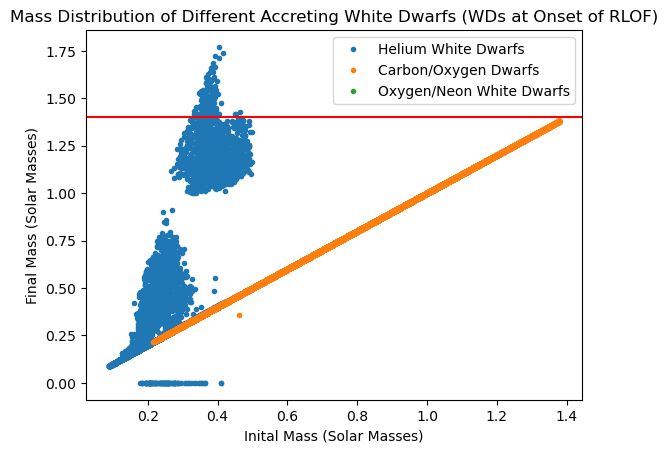

In [11]:
# looking for the indicies for these different stellar types

# where_wd = np.where((WD_types_LM==10) | (WD_types_LM==11) | (WD_types_LM==12))
where_wd_helium = np.where((WD_types_LM==10)) #selecting the indiices of each specified inital state 
where_wd_co = np.where((WD_types_LM==11))
where_wd_on = np.where((WD_types_LM==12))

# getting each data slice of the different types of WDs
wd_helium_init_table = RLOF_LM_table_1_accret[where_wd_helium]
wd_co_init_table = RLOF_LM_table_1_accret[where_wd_co]
wd_on_init_table = RLOF_LM_table_1_accret[where_wd_on]

plt.plot(wd_helium_init_table['Mass(1)<MT'], wd_helium_init_table['Mass(1)>MT'], '.',label='Helium White Dwarfs')
plt.plot(wd_co_init_table['Mass(1)<MT'], wd_co_init_table['Mass(1)>MT'],'.', label='Carbon/Oxygen Dwarfs')
plt.plot(wd_on_init_table['Mass(1)<MT'], wd_on_init_table['Mass(1)>MT'],'.' ,label='Oxygen/Neon White Dwarfs')
plt.axhline(1.4, color = 'r', linestyle = '-') 
plt.xlabel("Inital Mass (Solar Masses)")
plt.ylabel("Final Mass (Solar Masses)")
plt.title("Mass Distribution of Different Accreting White Dwarfs (WDs at Onset of RLOF)")
plt.legend()


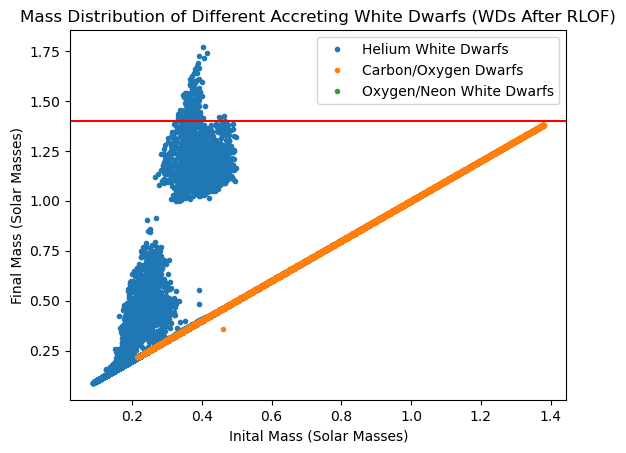

In [12]:
# looking for the indicies for these different stellar types
where_wd_f = np.where((WD_types_final_LM==10) | (WD_types_final_LM==11) | (WD_types_final_LM==12))
where_wd_helium_f = np.where((WD_types_final_LM==10)) #selecting the indiices of each specified inital state 
where_wd_co_f = np.where((WD_types_final_LM==11))
where_wd_on_f = np.where((WD_types_final_LM==12))

# getting each data slice of the different types of WDs
wd_helium_final_table = RLOF_LM_table_1_accret[where_wd_helium_f]
wd_co_final_table = RLOF_LM_table_1_accret[where_wd_co_f]
wd_on_final_table = RLOF_LM_table_1_accret[where_wd_on_f]

plt.plot(wd_helium_final_table['Mass(1)<MT'], wd_helium_final_table['Mass(1)>MT'], '.',label='Helium White Dwarfs')
plt.plot(wd_co_final_table['Mass(1)<MT'], wd_co_final_table['Mass(1)>MT'],'.', label='Carbon/Oxygen Dwarfs')
plt.plot(wd_on_final_table['Mass(1)<MT'], wd_on_final_table['Mass(1)>MT'],'.' ,label='Oxygen/Neon White Dwarfs')
plt.axhline(1.4, color = 'r', linestyle = '-') 
plt.xlabel("Inital Mass (Solar Masses)")
plt.ylabel("Final Mass (Solar Masses)")
plt.title("Mass Distribution of Different Accreting White Dwarfs (WDs After RLOF)")
plt.legend()


/tmp/ipykernel_1874698/4032923039.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('RdYlBu')
/tmp/ipykernel_1874698/4032923039.py:6: RuntimeWarning: divide by zero encountered in log10
  sc = plt.scatter(wd_co_final_table['Mass(1)>MT'], wd_co_final_table['Mass(1)>MT'], c=np.log10(wd_mass_change_co), s=35, cmap=cm)
/tmp/ipykernel_1874698/4032923039.py:6: RuntimeWarning: invalid value encountered in log10
  sc = plt.scatter(wd_co_final_table['Mass(1)>MT'], wd_co_final_table['Mass(1)>MT'], c=np.log10(wd_mass_change_co), s=35, cmap=cm)


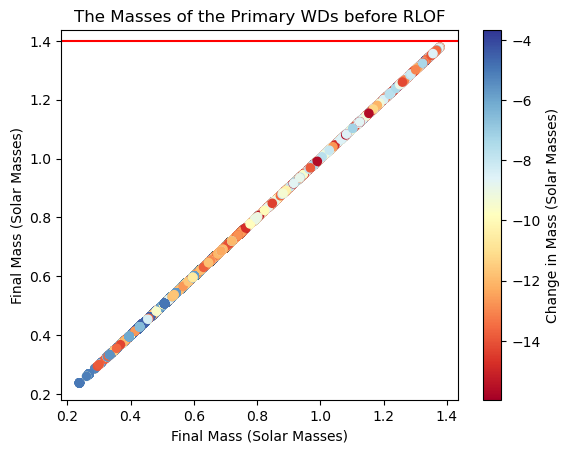

In [22]:
# these WDs are accreting but not a lot, very small 
wd_mass_change_co = wd_co_final_table['Mass(1)>MT'] - wd_co_final_table['Mass(1)<MT']


cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(wd_co_final_table['Mass(1)>MT'], wd_co_final_table['Mass(1)>MT'], c=np.log10(wd_mass_change_co), s=35, cmap=cm)
plt.colorbar(sc, label="Change in Mass (Solar Masses)")
plt.xlabel("Final Mass (Solar Masses)")
plt.ylabel("Final Mass (Solar Masses)")
plt.title("The Masses of the Primary WDs before RLOF")
plt.axhline(1.4, color = 'r', linestyle = '-') 

Let's look at specifically a subset of data of COWDs that accrete mass and not through unstable mass transfer (commen envelope)

47729
117456


/tmp/ipykernel_1874698/3009977028.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('RdYlBu')


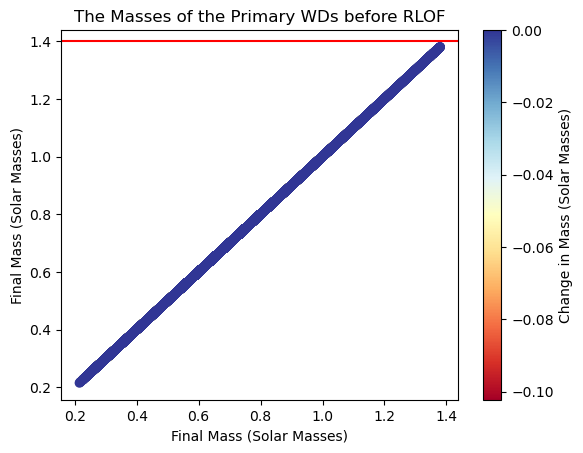

In [23]:
# these WDs are accreting but not a lot
ce_bool = wd_co_final_table['CEE>MT'] == 1

wd_mass_change_co = wd_co_final_table['Mass(1)>MT'] - wd_co_final_table['Mass(1)<MT']

print(sum(ce_bool))
print(len(wd_co_final_table))


cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(wd_co_final_table['Mass(1)>MT'][ce_bool], wd_co_final_table['Mass(1)>MT'][ce_bool], c=(wd_mass_change_co[ce_bool]), s=35, cmap=cm)

plt.colorbar(sc, label="Change in Mass (Solar Masses)")
plt.xlabel("Final Mass (Solar Masses)")
plt.ylabel("Final Mass (Solar Masses)")
plt.title("The Masses of the Primary WDs before RLOF")
plt.axhline(1.4, color = 'r', linestyle = '-') 

In [24]:
stable_bool = wd_co_init_table['CEE>MT'] == 0
co_stable = wd_co_init_table[stable_bool]
co_stable

Beta,CEE>MT,Eccentricity<MT,Eccentricity>MT,Luminosity(1),Luminosity(2),MT_Event_Counter,Mass(1)<MT,Mass(1)>MT,Mass(2)<MT,Mass(2)>MT,MassTransferRateDonor,Merger,Metallicity@ZAMS(1),RLOF(1)<MT,RLOF(1)>MT,RLOF(2)<MT,RLOF(2)>MT,Radius(1)<MT,Radius(1)>MT,Radius(1)|RL<step,Radius(1)|RL>step,Radius(2)<MT,Radius(2)>MT,Radius(2)|RL<step,Radius(2)|RL>step,Record_Type,SEED,SemiMajorAxis<MT,SemiMajorAxis>MT,Stellar_Type(1)<MT,Stellar_Type(1)>MT,Stellar_Type(2)<MT,Stellar_Type(2)>MT,Teff(1),Teff(2),Time<MT,Time>MT,Zeta_Hurley(1),Zeta_Hurley(2),Zeta_Hurley_He(1),Zeta_Hurley_He(2),Zeta_Soberman(1),Zeta_Soberman(2),Zeta_Soberman_He(1),Zeta_Soberman_He(2)
float64,uint8,float64,float64,float64,float64,uint32,float64,float64,float64,float64,float64,uint8,float64,uint8,uint8,uint8,uint8,float64,float64,float64,float64,float64,float64,float64,float64,uint32,uint64,float64,float64,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1.1819242725908363e-17,0,0.0,0.0,2.6185956682334043e-06,24.730467530210284,2,0.8876201687585465,0.8876201687585465,1.0352744909484257,0.36791807948869976,234.6607700731949,0,0.0001475633987143172,0,0,0,1,0.009317026996987382,0.009317026996987382,0.0003952370292026298,0.00011775251948243853,25.453400266981195,0.01658916128848528,1.0064549985523445,0.0003130762607455443,1,900016,64.46453340000616,173.24944396103658,11,11,3,10,2407.9971680922476,100039.9358114858,5102.595978822963,5102.9121375683335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.285110280997332e-07,0,0.0,0.0,0.0011870859412051024,8.233740216874244,4,1.3090592487671473,1.309059426184703,1.5222238796635028,0.7458169063901713,36.89892912579361,0,0.0001647393829398977,0,0,0,1,0.004101456585457414,0.004101453666147036,0.010114502790788201,0.0049369474919023874,0.4375174597471506,0.010943885842979395,1.0070894764714173,0.017028048993157456,1,900025,1.1081246076670577,1.939285053666813,11,11,8,11,16746.697401197544,93560.18039442302,113.53429090073953,113.54661402508454,0.0,0.0,1.8500715488110213,0.0,0.0,0.0,4918939.146835906,0.0
3.970139261608514e-15,0,0.0,0.0,0.00028458291313129065,1.6604135488110743,3,0.6898988914042712,0.6898988914042796,2.449088380001526,0.32445351526289606,6.948299750953548,0,0.0026636728335410536,0,0,0,1,0.011619935546136322,0.011619935546136224,0.005265092179554946,0.008875807309105841,3.9884376453422976,0.058342927445719256,1.017279401150446,0.0628489468687866,1,900080,7.986266401965879,2.9389208922275003,11,11,2,7,6961.90163994819,27154.230254000453,515.3165294196375,515.5283013648375,0.0,-0.256457064933824,1.7435429350660538,0.0,0.0,-0.3333333333333333,54589086392368.95,0.0
1.3111758132661946e-09,0,0.0,0.0,5.019976258663661e-05,7.087049989250602,3,0.5463590942426854,0.5463590943165801,0.7748865983464004,0.7185289684691758,601.6965048428939,0,0.00012429055542044829,0,0,0,1,0.01352877888520032,0.013528778884128453,0.010441992922541974,0.010376594747713574,1.590469854245665,0.011270379615201514,1.0465210428569258,0.007627744034696682,1,900116,3.7112766472277965,3.667802284148988,11,11,8,11,4181.418669433225,88802.3869151258,576.7944583568672,576.7996573954301,0.0,0.0,1.853831075301315,0.0,0.0,0.0,4929162574.473037,0.0
1.0467549931080632e-14,0,0.0,0.0,4.1671419580948966e-05,0.3994929982604781,3,0.6998085341894562,0.6998085341894729,1.8579799614081205,0.27203867991754643,4.421559025046806,0,0.00029132140065921006,0,0,0,1,0.011498061692627955,0.011498061692627749,0.0044934114847011205,0.0022185770353282384,4.095857470015807,0.039350280957921126,1.0265668367487355,0.011671327782918208,1,900124,8.576243675613183,11.207746219891563,11,11,2,7,4329.370904062946,23156.92620912197,913.2350314334763,913.6929205776072,0.0,-0.16743871428797802,1.8325612857117843,0.0,0.0,-0.3333333333333333,28059810762432.297,0.0
3.4768326247199397e-16,0,0.0,0.0,0.0003569990308284677,5.0156136713417006,3,0.7660402601591217,0.7660402601591225,2.699278398873898,0.38504308994717534,30.02282088069638,0,0.0007925466472

Text(0.5, 1.0, 'The Mass and Period of the Primary Star After RLOF')

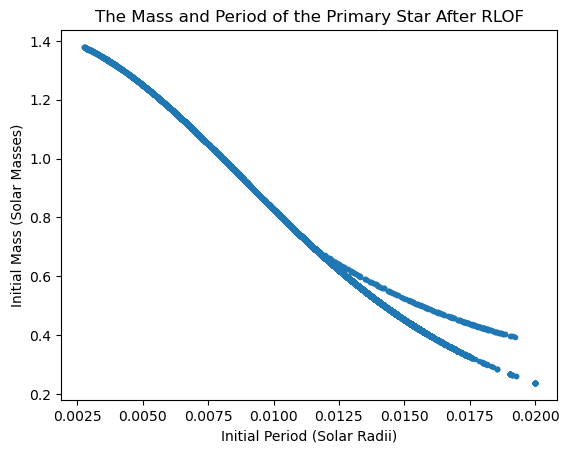

In [25]:
# now let's look at the final period and mass
init_period_1 = co_stable ['Radius(1)<MT']
init_mass_init = co_stable['Mass(1)<MT']

plt.plot(init_period_1,init_mass_init,'.')
plt.xlabel("Initial Period (Solar Radii)")
plt.ylabel("Initial Mass (Solar Masses)")
plt.title("The Mass and Period of the Primary Star After RLOF")

Text(0.5, 1.0, 'The Mass and Period of the Primary Star After RLOF')

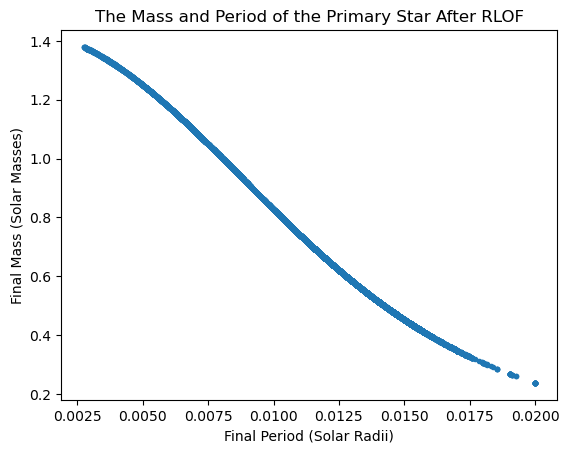

In [26]:
# now let's look at the final period and mass
final_period_1 = co_stable ['Radius(1)>MT']
final_mass_init = co_stable['Mass(1)>MT']

plt.plot(final_period_1,final_mass_init,'.')
plt.xlabel("Final Period (Solar Radii)")
plt.ylabel("Final Mass (Solar Masses)")
plt.title("The Mass and Period of the Primary Star After RLOF")

In [61]:
# you are saved no more excel sheet
print(wd_co_final_table['Mass(1)<MT', 'Mass(1)>MT', 'Mass(2)<MT', 'Mass(2)>MT'])

# np.savetxt(wd_co_final_table['Mass(1)<MT', 'Mass(1)>MT', 'Mass(2)<MT', 'Mass(2)>MT'], )

    Mass(1)<MT         Mass(1)>MT         Mass(2)<MT          Mass(2)>MT    
------------------ ------------------ ------------------ -------------------
0.8876201687585465 0.8876201687585465 1.0352744909484257 0.36791807948869976
0.9810455335118108 0.9810455335118108  5.800472007054785  1.0956426489411404
1.3090592487671473 1.3090592487671473  4.753591402866659   1.522356906777668
1.3090592487671473  1.309059426184703 1.5222238796635028  0.7458169063901713
0.6358379603947141 0.6358379603947141 3.2839904771206805  0.5134091771016284
1.2414660266666018 1.2414660266666018 11.993091107403485  2.8054160892355835
0.6299644541028584 0.6299644541028584  3.008185930444173  0.8485446999352998
0.5181231794350921 0.5181231794350921 2.9900107924818706  0.8822159623146474
0.7990204782370871 0.7990204782370871  1.758768578954736   0.529534964368592
0.6898988914042712 0.6898988914042796  2.449088380001526 0.32445351526289606
               ...                ...                ...                 ...

Let's just look at how the stellar state evolves for these inital WDs that are accreting mass

Text(0.5, 1.0, 'The Evolution of the Stellar Types of WDs')

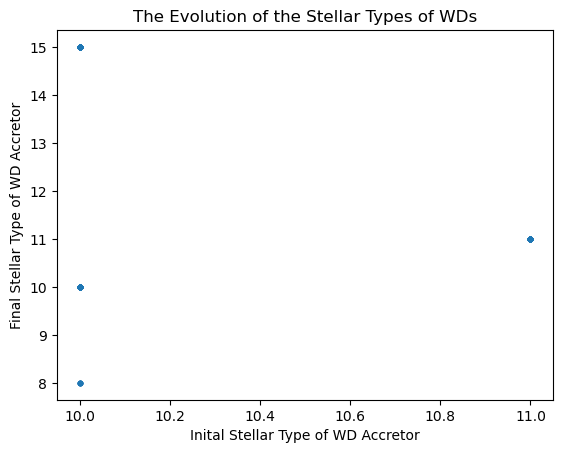

In [16]:
plt.plot(WD_types_LM, WD_types_final_LM,'.')
plt.xlabel("Inital Stellar Type of WD Accretor")
plt.ylabel("Final Stellar Type of WD Accretor")
plt.title("The Evolution of the Stellar Types of WDs")

In [52]:
# # let's select the part of the table where we have the stellar types equal to WDs
# is_WD_init_bool_accret  =  np.logical_or(RLOF_LM_table_1_accret["Stellar_Type(1)<MT"] == 10, RLOF_LM_table_1_accret["Stellar_Type(1)<MT"] == 11, RLOF_LM_table_1_accret["Stellar_Type(1)<MT"] == 12)
# RLOF_LM_wd_init_table = RLOF_LM_table_1_accret[is_WD_init_bool_accret]

# is_WD_final_bool_accret  =  np.logical_or(RLOF_LM_table_1_accret["Stellar_Type(1)>MT"] == 10, RLOF_LM_table_1_accret["Stellar_Type(1)>MT"] == 11, RLOF_LM_table_1_accret["Stellar_Type(1)>MT"] == 12) # what was a WD after RLOF
# RLOF_LM_wd_final_table = RLOF_LM_table_1_accret[is_WD_final_bool_accret]

In [24]:
# # let's look the mass of these stellar types before and then after

# wd_mass_init_1 = RLOF_LM_wd_init_table['Mass(1)<MT']
# wd_mass_final_of_init = RLOF_LM_wd_init_table['Mass(1)>MT']
# wd_mass_final_1 = RLOF_LM_wd_final_table['Mass(1)>MT']
# wd_mass_init_of_final = RLOF_LM_wd_final_table['Mass(1)<MT']

# # change in mass
# wd_mass_change_1_init = wd_mass_final_of_init - wd_mass_init_1
# wd_mass_change_1_final = wd_mass_final_1 - wd_mass_init_of_final

# # print(np.where(wd_mass_init_1>=1.4))
# # print(np.where(wd_mass_final_1>=1.4))

In [27]:
# let's name the columns that relate to the stellar mass of a system

init_mass_WD = RLOF_LM_table_1_accret['Mass(1)<MT']
final_mass_WD = RLOF_LM_table_1_accret['Mass(1)>MT']

wd_mass_change = final_mass_WD - init_mass_WD

/tmp/ipykernel_1874698/3654312346.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('RdYlBu')


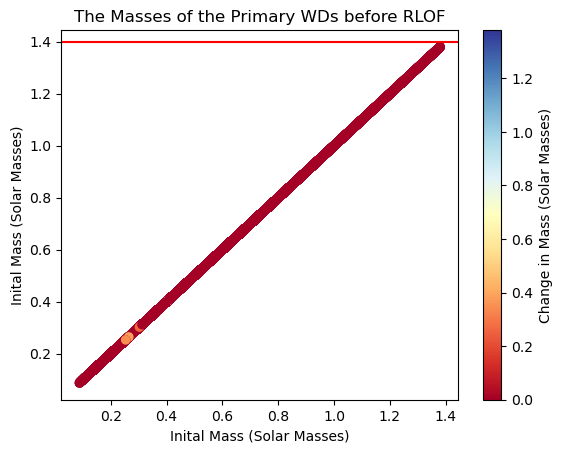

In [28]:
# plotting for the inital mass of the primary WDs (help from the internet)
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(init_mass_WD, init_mass_WD, c=wd_mass_change, vmin=0, vmax=np.max(init_mass_WD), s=35, cmap=cm)
plt.colorbar(sc, label="Change in Mass (Solar Masses)")
plt.xlabel("Inital Mass (Solar Masses)")
plt.ylabel("Inital Mass (Solar Masses)")
plt.title("The Masses of the Primary WDs before RLOF")
plt.axhline(1.4, color = 'r', linestyle = '-') 

/tmp/ipykernel_1874698/3772858263.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('RdYlBu')


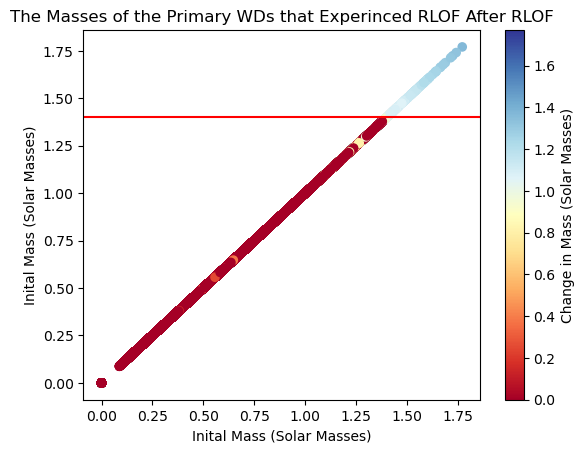

In [29]:
# plotting for the final mass of the stars that were originally WDs 
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(final_mass_WD, final_mass_WD, c=wd_mass_change, vmin=0, vmax=np.max(final_mass_WD), s=35, cmap=cm)
plt.colorbar(sc, label="Change in Mass (Solar Masses)")
plt.xlabel("Final Mass (Solar Masses)")
plt.ylabel("Final Mass (Solar Masses)")
plt.title("The Masses of the Primary WDs that Experinced RLOF After RLOF")
plt.axhline(1.4, color = 'r', linestyle = '-') 

In [30]:
# this actually does not make sense to do because the final states were already pre-determined to be WDS by my selection above
# looking for WD type of the stars that reached above 1.4 solar masses
chandra_desind = np.where((init_mass_WD>=1.4))
RLOF_LM_wd_init_table_types = RLOF_LM_table_1_accret[chandra_desind]
WD_types_LM_init = RLOF_LM_wd_init_table_types['Stellar_Type(1)<MT']
print(WD_types_LM_init.shape) #seeing how many different instances of this show up

# we can loop through each supernova to determine which event took place

# this may be silly but this is to be able to label each type of sn type using the legend

WD_types_LM_init_array = np.array(WD_types_LM_init)

# making empty lists to keep different types of star evolutions
wd_tot_i = []
wd_helium_i = []
wd_co_i =[]
wd_on_i = []

for wd in WD_types_LM_init_array:

    if wd == 10:
        wd_helium_i.append(wd)
        wd_tot_i.append(wd)

    elif wd == 11:
        wd_co_i.append(wd)
        wd_tot_i.append(wd)

    elif wd == 12:
        wd_on_i.append(wd)
        wd_tot_i.append(wd)

print("The number of primary stellar objects that were white dwarfs before RLOF and had more than 1.4 Solar Masses = {}" .format(len(wd_tot_i)))
print("The number of primary stellar objects that were helium white dwarfs and had more than 1.4 Solar Masses = {}" .format(len(wd_helium_i)))
print("The number of primary stellar objects that were carbon/oxygen white dwarfs and had more than 1.4 Solar Masses = {}" .format(len(wd_co_i)))
print("The number of primary stellar objects that were oxygen/neon white dwarfs and had more than 1.4 Solar Masses = {}" .format(len(wd_on_i)))

(0,)
The number of primary stellar objects that were white dwarfs before RLOF and had more than 1.4 Solar Masses = 0
The number of primary stellar objects that were helium white dwarfs and had more than 1.4 Solar Masses = 0
The number of primary stellar objects that were carbon/oxygen white dwarfs and had more than 1.4 Solar Masses = 0
The number of primary stellar objects that were oxygen/neon white dwarfs and had more than 1.4 Solar Masses = 0


In [31]:
# this actually does not make sense to do because the final states were already pre-determined to be WDS by my selection above
# looking for WD type of the stars that reached above 1.4 solar masses
chandra_desind = np.where((final_mass_WD>=1.4))
RLOF_LM_wd_final_table_types = RLOF_LM_table_1_accret[chandra_desind]
WD_types_LM_init = RLOF_LM_wd_final_table_types['Stellar_Type(1)>MT']
print(WD_types_LM_init.shape) #seeing how many different instances of this show up

# we can loop through each supernova to determine which event took place

# this may be silly but this is to be able to label each type of sn type using the legend

WD_types_LM_init_array = np.array(WD_types_LM_init)

# making empty lists to keep different types of star evolutions
wd_tot_i = []
wd_helium_i = []
wd_co_i =[]
wd_on_i = []

for wd in WD_types_LM_init_array:

    if wd == 10:
        wd_helium_i.append(wd)
        wd_tot_i.append(wd)

    elif wd == 11:
        wd_co_i.append(wd)
        wd_tot_i.append(wd)

    elif wd == 12:
        wd_on_i.append(wd)
        wd_tot_i.append(wd)

print("The number of primary stellar objects that were white dwarfs after RLOF and had more than 1.4 Solar Masses = {}" .format(len(wd_tot_i)))
print("The number of primary stellar objects that were helium white dwarfs and had more than 1.4 Solar Masses = {}" .format(len(wd_helium_i)))
print("The number of primary stellar objects that were carbon/oxygen white dwarfs and had more than 1.4 Solar Masses = {}" .format(len(wd_co_i)))
print("The number of primary stellar objects that were oxygen/neon white dwarfs and had more than 1.4 Solar Masses = {}" .format(len(wd_on_i)))

(141,)
The number of primary stellar objects that were white dwarfs after RLOF and had more than 1.4 Solar Masses = 141
The number of primary stellar objects that were helium white dwarfs and had more than 1.4 Solar Masses = 141
The number of primary stellar objects that were carbon/oxygen white dwarfs and had more than 1.4 Solar Masses = 0
The number of primary stellar objects that were oxygen/neon white dwarfs and had more than 1.4 Solar Masses = 0


Let's now look at if there are any stars that became WDs after RLOF that became 1.4 solar masses + check their stellar mass distribution 

In [26]:
# let's look at any stars that were WDs after RLOF 
# is_WD_init_bool  =  np.logical_or(OG_RLOF_TABLE["Stellar_Type(1)<MT"] == 10, OG_RLOF_TABLE["Stellar_Type(1)<MT"] == 11, OG_RLOF_TABLE["Stellar_Type(1)<MT"] == 12)
is_WD_final_bool  =  np.logical_or(OG_RLOF_TABLE["Stellar_Type(1)>MT"] == 10, OG_RLOF_TABLE["Stellar_Type(1)>MT"] == 11, OG_RLOF_TABLE["Stellar_Type(1)>MT"] == 12)
# OG_RLOF_TABLE_WD = OG_RLOF_TABLE[is_WD_init_bool]
OG_RLOF_TABLE_WD_f = OG_RLOF_TABLE[is_WD_final_bool]
# RLOF_LM_table_1_accret = OG_RLOF_TABLE_WD[OG_RLOF_TABLE_WD["RLOF(2)>MT"]==1]
RLOF_LM_table_1_accret_f = OG_RLOF_TABLE_WD_f[OG_RLOF_TABLE_WD_f["RLOF(2)>MT"]==1]

# star_1_accret_desind = np.where(RLOF_LM_table["RLOF(2)>MT"]==1) #star 2 is the donor and star 1 is the accretor


# let's look at these when star 1 is the accretor
# star_1_accret_desind = np.where(RLOF_LM_table["RLOF(2)>MT"]==1) #star 2 is the donor and star 1 is the accretor
# RLOF_LM_table_1_accret = RLOF_LM_table[star_1_accret_desind]
# RLOF_LM_table_1_accret_f

In [27]:
# this actually does not make sense to do because the final states were already pre-determined to be WDS by my selection above

WD_types_LM = RLOF_LM_table_1_accret_f['Stellar_Type(1)<MT']
# print(len(WD_types_LM)) #seeing how many different instances of this show up

# we can loop through each supernova to determine which event took place

# this may be silly but this is to be able to label each type of sn type using the legend

WD_types_LM_array = np.array(WD_types_LM)

# making empty lists to keep different types of star evolutions
wd_tot_i = []
wd_helium_i = []
wd_co_i =[]
wd_on_i = []

for wd in WD_types_LM_array:

    if wd == 10:
        wd_helium_i.append(wd)
        wd_tot_i.append(wd)

    elif wd == 11:
        wd_co_i.append(wd)
        wd_tot_i.append(wd)

    elif wd == 12:
        wd_on_i.append(wd)
        wd_tot_i.append(wd)

print("The number stars that were WD accretors that were WDs before and after RLOF = {}" .format(len(WD_types_LM)))
# print("The number of primary stellar objects that were white dwarfs after RLOF = {}" .format(len(wd_tot_i)))
print("The number of primary stellar objects that were helium white dwarfs = {}" .format(len(wd_helium_i)))
print("The number of primary stellar objects that were carbon/oxygen white dwarfs = {}" .format(len(wd_co_i)))
print("The number of primary stellar objects that were oxygen/neon white dwarfs = {}" .format(len(wd_on_i)))

The number stars that were WD accretors that were WDs before and after RLOF = 176946
The number of primary stellar objects that were helium white dwarfs = 59405
The number of primary stellar objects that were carbon/oxygen white dwarfs = 117456
The number of primary stellar objects that were oxygen/neon white dwarfs = 0


In [28]:
# this actually does not make sense to do because the final states were already pre-determined to be WDS by my selection above

WD_types_final_LM = RLOF_LM_table_1_accret_f['Stellar_Type(1)>MT']
# print(len(WD_types_final_LM)) #seeing how many different instances of this show up

# we can loop through each supernova to determine which event took place

# this may be silly but this is to be able to label each type of sn type using the legend

WD_types_final_LM_array = np.array(WD_types_final_LM)

# making empty lists to keep different types of star evolutions
wd_tot_i = []
wd_helium_i = []
wd_co_i =[]
wd_on_i = []

for wd in WD_types_final_LM_array:

    if wd == 10:
        wd_helium_i.append(wd)
        wd_tot_i.append(wd)

    elif wd == 11:
        wd_co_i.append(wd)
        wd_tot_i.append(wd)

    elif wd == 12:
        wd_on_i.append(wd)
        wd_tot_i.append(wd)

print("The number of primary stellar objects that remained as white dwarfs after RLOF = {}" .format(len(wd_tot_i)))
print("The number of primary stellar objects that remained as helium white dwarfs = {}" .format(len(wd_helium_i)))
print("The number of primary stellar objects that remained as carbon/oxygen white dwarfs = {}" .format(len(wd_co_i)))
print("The number of primary stellar objects that remained as oxygen/neon white dwarfs = {}" .format(len(wd_on_i)))

The number of primary stellar objects that remained as white dwarfs after RLOF = 176946
The number of primary stellar objects that remained as helium white dwarfs = 59424
The number of primary stellar objects that remained as carbon/oxygen white dwarfs = 117522
The number of primary stellar objects that remained as oxygen/neon white dwarfs = 0


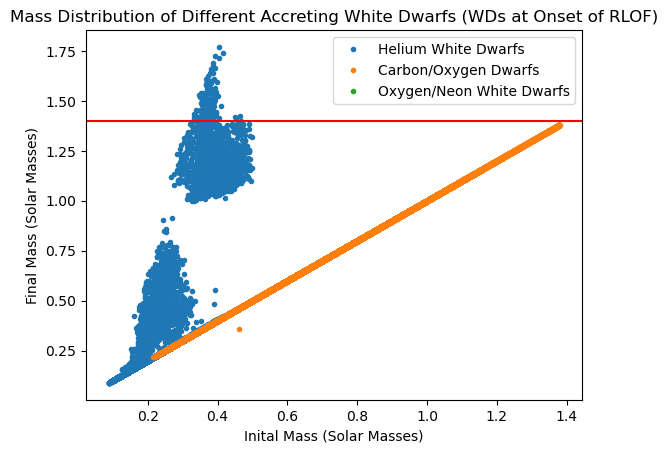

In [29]:
# looking for the indicies for these different stellar types

# where_wd = np.where((WD_types_LM==10) | (WD_types_LM==11) | (WD_types_LM==12))
where_wd_helium = np.where((WD_types_LM==10)) #selecting the indiices of each specified inital state 
where_wd_co = np.where((WD_types_LM==11))
where_wd_on = np.where((WD_types_LM==12))

# getting each data slice of the different types of WDs
wd_helium_init_table = RLOF_LM_table_1_accret_f[where_wd_helium]
wd_co_init_table = RLOF_LM_table_1_accret_f[where_wd_co]
wd_on_init_table = RLOF_LM_table_1_accret_f[where_wd_on]

plt.plot(wd_helium_init_table['Mass(1)<MT'], wd_helium_init_table['Mass(1)>MT'], '.',label='Helium White Dwarfs')
plt.plot(wd_co_init_table['Mass(1)<MT'], wd_co_init_table['Mass(1)>MT'],'.', label='Carbon/Oxygen Dwarfs')
plt.plot(wd_on_init_table['Mass(1)<MT'], wd_on_init_table['Mass(1)>MT'],'.' ,label='Oxygen/Neon White Dwarfs')
plt.axhline(1.4, color = 'r', linestyle = '-') 
plt.xlabel("Inital Mass (Solar Masses)")
plt.ylabel("Final Mass (Solar Masses)")
plt.title("Mass Distribution of Different Accreting White Dwarfs (WDs at Onset of RLOF)")
plt.legend()


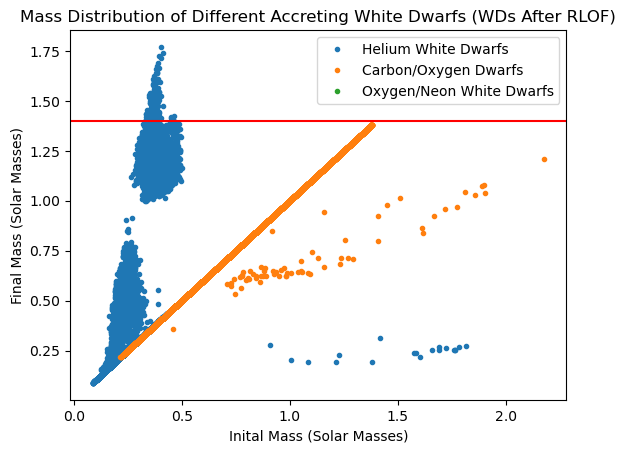

In [31]:
# looking for the indicies for these different final stellar types
where_wd_f = np.where((WD_types_final_LM==10) | (WD_types_final_LM==11) | (WD_types_final_LM==12))
where_wd_helium_f = np.where((WD_types_final_LM==10)) #selecting the indiices of each specified inital state 
where_wd_co_f = np.where((WD_types_final_LM==11))
where_wd_on_f = np.where((WD_types_final_LM==12))

# getting each data slice of the different types of WDs
wd_helium_final_table = RLOF_LM_table_1_accret_f[where_wd_helium_f]
wd_co_final_table = RLOF_LM_table_1_accret_f[where_wd_co_f]
wd_on_final_table = RLOF_LM_table_1_accret_f[where_wd_on_f]

plt.plot(wd_helium_final_table['Mass(1)<MT'], wd_helium_final_table['Mass(1)>MT'], '.',label='Helium White Dwarfs')
plt.plot(wd_co_final_table['Mass(1)<MT'], wd_co_final_table['Mass(1)>MT'],'.', label='Carbon/Oxygen Dwarfs')
plt.plot(wd_on_final_table['Mass(1)<MT'], wd_on_final_table['Mass(1)>MT'],'.' ,label='Oxygen/Neon White Dwarfs')
plt.axhline(1.4, color = 'r', linestyle = '-') 
plt.xlabel("Inital Mass (Solar Masses)")
plt.ylabel("Final Mass (Solar Masses)")
plt.title("Mass Distribution of Different Accreting White Dwarfs (WDs After RLOF)")
plt.legend()

#b maybe some heavier stellar objects de-evolved and became WDs with lighter masses so these objects with more than 1.4 solar masses may not be WDs initally

 maybe some heavier stellar objects de-evolved and became WDs with lighter masses so these objects with more than 1.4 solar masses may not be WDs initally

Text(0.5, 1.0, 'The Evolution of the Stellar Types of WDs')

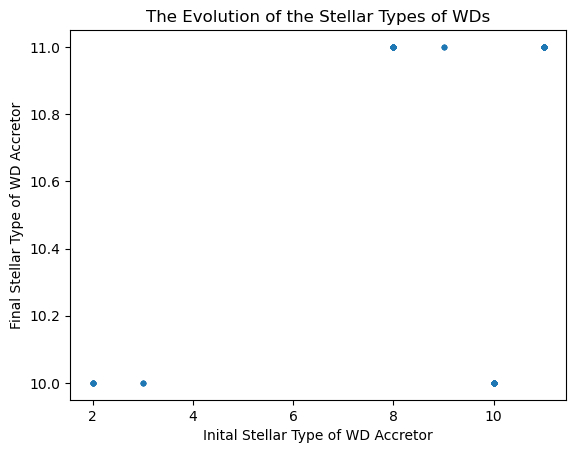

In [34]:
plt.plot(WD_types_LM, WD_types_final_LM,'.')
plt.xlabel("Inital Stellar Type of WD Accretor")
plt.ylabel("Final Stellar Type of WD Accretor")
plt.title("The Evolution of the Stellar Types of WDs")

a confirmation that some of the intial stars were not WDs

In [35]:
# let's name the columns that relate to the stellar mass of a system

init_mass_WD_f = RLOF_LM_table_1_accret_f['Mass(1)<MT']
final_mass_WD_f = RLOF_LM_table_1_accret_f['Mass(1)>MT']

wd_mass_change_f = final_mass_WD_f - init_mass_WD_f

/tmp/ipykernel_1142771/2107138051.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('RdYlBu')


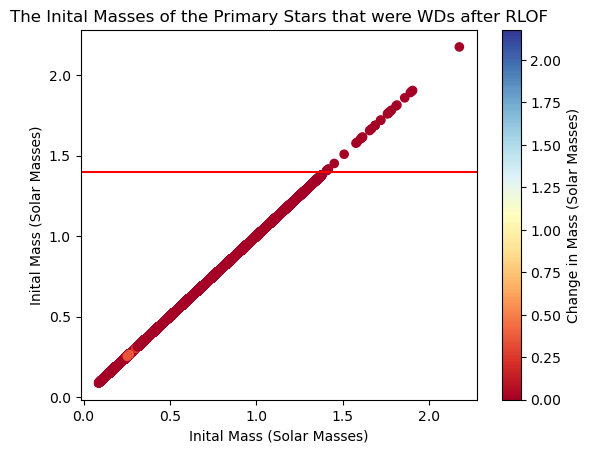

In [38]:
# plotting for the inital mass of the primary acccretor which became a WD
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(init_mass_WD_f, init_mass_WD_f, c=wd_mass_change_f, vmin=0, vmax=np.max(init_mass_WD_f), s=35, cmap=cm)
plt.colorbar(sc, label="Change in Mass (Solar Masses)")
plt.xlabel("Inital Mass (Solar Masses)")
plt.ylabel("Inital Mass (Solar Masses)")
plt.title("The Inital Masses of the Primary Stars that were WDs after RLOF")
plt.axhline(1.4, color = 'r', linestyle = '-') 

the stellar objects that are initally above 1.4 solar masses may be different stellar types than WDs that became WDs

/tmp/ipykernel_1142771/174837144.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('RdYlBu')


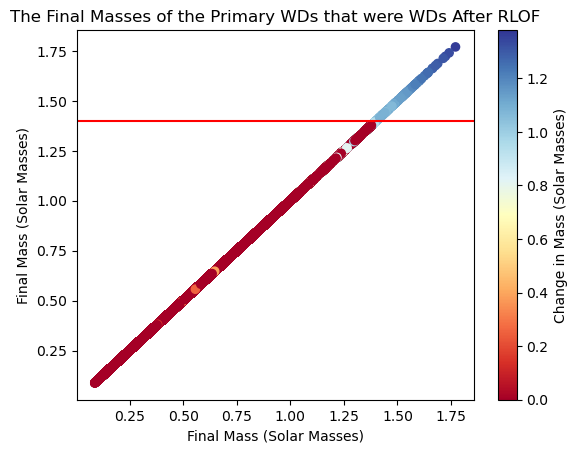

In [39]:
# plotting for the final mass of the accretor that was a WD after RLOF
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(final_mass_WD_f, final_mass_WD_f, c=wd_mass_change_f, vmin=0, vmax=np.max(init_mass_WD), s=35, cmap=cm)
plt.colorbar(sc, label="Change in Mass (Solar Masses)")
plt.xlabel("Final Mass (Solar Masses)")
plt.ylabel("Final Mass (Solar Masses)")
plt.title("The Final Masses of the Primary WDs that were WDs After RLOF")
plt.axhline(1.4, color = 'r', linestyle = '-') 

these final masses are of the WDs because we preselected this data slice to have final stellar types that are WDs

In [40]:
# this actually does not make sense to do because the final states were already pre-determined to be WDS by my selection above
# looking for WD type of the stars that reached above 1.4 solar masses
chandra_desind = np.where((init_mass_WD_f>=1.4))
RLOF_LM_wd_init_table_types = RLOF_LM_table_1_accret_f[chandra_desind]
WD_types_LM_init = RLOF_LM_wd_init_table_types['Stellar_Type(1)<MT']
print(WD_types_LM_init.shape) #seeing how many different instances of this show up

# we can loop through each supernova to determine which event took place

# this may be silly but this is to be able to label each type of sn type using the legend

WD_types_LM_init_array = np.array(WD_types_LM_init)

# making empty lists to keep different types of star evolutions
wd_tot_i = []
wd_helium_i = []
wd_co_i =[]
wd_on_i = []

for wd in WD_types_LM_init_array:

    if wd == 10:
        wd_helium_i.append(wd)
        wd_tot_i.append(wd)

    elif wd == 11:
        wd_co_i.append(wd)
        wd_tot_i.append(wd)

    elif wd == 12:
        wd_on_i.append(wd)
        wd_tot_i.append(wd)

print("The number of primary stellar objects that were white dwarfs after RLOF and had more than 1.4 Solar Masses = {}" .format(len(wd_tot_i)))
print("The number of primary stellar objects that were helium white dwarfs and had more than 1.4 Solar Masses = {}" .format(len(wd_helium_i)))
print("The number of primary stellar objects that were carbon/oxygen white dwarfs and had more than 1.4 Solar Masses = {}" .format(len(wd_co_i)))
print("The number of primary stellar objects that were oxygen/neon white dwarfs and had more than 1.4 Solar Masses = {}" .format(len(wd_on_i)))

(28,)
The number of primary stellar objects that were white dwarfs after RLOF and had more than 1.4 Solar Masses = 0
The number of primary stellar objects that were helium white dwarfs and had more than 1.4 Solar Masses = 0
The number of primary stellar objects that were carbon/oxygen white dwarfs and had more than 1.4 Solar Masses = 0
The number of primary stellar objects that were oxygen/neon white dwarfs and had more than 1.4 Solar Masses = 0


this confirms that all of the stellar objects that had masses above 1.4 solar masses were not WDs!

In [32]:
# this actually does not make sense to do because the final states were already pre-determined to be WDS by my selection above
# looking for WD type of the stars that reached above 1.4 solar masses
chandra_desind = np.where((final_mass_WD_f>=1.4))
RLOF_LM_wd_final_table_types = RLOF_LM_table_1_accret_f[chandra_desind]
WD_types_LM_final = RLOF_LM_wd_final_table_types['Stellar_Type(1)>MT']
print(WD_types_LM_init.shape) #seeing how many different instances of this show up

# we can loop through each supernova to determine which event took place

# this may be silly but this is to be able to label each type of sn type using the legend

WD_types_LM_final_array = np.array(WD_types_LM_final)

# making empty lists to keep different types of star evolutions
wd_tot_i = []
wd_helium_i = []
wd_co_i =[]
wd_on_i = []

for wd in WD_types_LM_final_array:

    if wd == 10:
        wd_helium_i.append(wd)
        wd_tot_i.append(wd)

    elif wd == 11:
        wd_co_i.append(wd)
        wd_tot_i.append(wd)

    elif wd == 12:
        wd_on_i.append(wd)
        wd_tot_i.append(wd)

print("The number of primary stellar objects that were white dwarfs after RLOF and had more than 1.4 Solar Masses = {}" .format(len(wd_tot_i)))
print("The number of primary stellar objects that were helium white dwarfs and had more than 1.4 Solar Masses = {}" .format(len(wd_helium_i)))
print("The number of primary stellar objects that were carbon/oxygen white dwarfs and had more than 1.4 Solar Masses = {}" .format(len(wd_co_i)))
print("The number of primary stellar objects that were oxygen/neon white dwarfs and had more than 1.4 Solar Masses = {}" .format(len(wd_on_i)))

NameError: name 'final_mass_WD_f' is not defined

so only HeWD remain above 1.4 solar masses in the a final state (when the first stellar object is the accretor), this is supported by the original plot of mass distribution (only HeWDs had final masses above 1.4 solar masses), these are stars whose inital stellar state is not necessarily a WD but ends up being a WD after accreting mass

Let's now investigate what happens when star 2 is the accretor + a WD before RLOF

In [42]:
is_WD_init_bool_2  =  np.logical_or(OG_RLOF_TABLE["Stellar_Type(2)<MT"] == 10, OG_RLOF_TABLE["Stellar_Type(2)<MT"] == 11, OG_RLOF_TABLE["Stellar_Type(2)<MT"] == 12)
# is_WD_final_bool  =  np.logical_or(OG_RLOF_TABLE["Stellar_Type(1)>MT"] == 10, OG_RLOF_TABLE["Stellar_Type(1)>MT"] == 11, OG_RLOF_TABLE["Stellar_Type(1)>MT"] == 12)
OG_RLOF_TABLE_WD_2 = OG_RLOF_TABLE[is_WD_init_bool_2]
# OG_RLOF_TABLE_WD_final = OG_RLOF_TABLE_WD[is_WD_final_bool]
# OG_RLOF_TABLE_WD_final = OG_RLOF_TABLE[np.logical_and(is_WD_init_bool,is_WD_final_bool)]
RLOF_LM_table_2_accret = OG_RLOF_TABLE_WD_2[OG_RLOF_TABLE_WD_2["RLOF(1)>MT"]==1]

# star_1_accret_desind = np.where(RLOF_LM_table["RLOF(2)>MT"]==1) #star 2 is the donor and star 1 is the accretor


# let's look at these when star 1 is the accretor
# star_1_accret_desind = np.where(RLOF_LM_table["RLOF(2)>MT"]==1) #star 2 is the donor and star 1 is the accretor
# RLOF_LM_table_1_accret = RLOF_LM_table[star_1_accret_desind]
RLOF_LM_table_2_accret

Beta,CEE>MT,Eccentricity<MT,Eccentricity>MT,Luminosity(1),Luminosity(2),MT_Event_Counter,Mass(1)<MT,Mass(1)>MT,Mass(2)<MT,Mass(2)>MT,MassTransferRateDonor,Merger,Metallicity@ZAMS(1),RLOF(1)<MT,RLOF(1)>MT,RLOF(2)<MT,RLOF(2)>MT,Radius(1)<MT,Radius(1)>MT,Radius(1)|RL<step,Radius(1)|RL>step,Radius(2)<MT,Radius(2)>MT,Radius(2)|RL<step,Radius(2)|RL>step,Record_Type,SEED,SemiMajorAxis<MT,SemiMajorAxis>MT,Stellar_Type(1)<MT,Stellar_Type(1)>MT,Stellar_Type(2)<MT,Stellar_Type(2)>MT,Teff(1),Teff(2),Time<MT,Time>MT,Zeta_Hurley(1),Zeta_Hurley(2),Zeta_Hurley_He(1),Zeta_Hurley_He(2),Zeta_Soberman(1),Zeta_Soberman(2),Zeta_Soberman_He(1),Zeta_Soberman_He(2)
float64,uint8,float64,float64,float64,float64,uint32,float64,float64,float64,float64,float64,uint8,float64,uint8,uint8,uint8,uint8,float64,float64,float64,float64,float64,float64,float64,float64,uint32,uint64,float64,float64,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1.691204038794917e-09,0,0.0,0.0,65.78186696893086,27.481926894960733,4,1.7891092804152224,0.8457582250369818,1.251956199950213,1.251956201545612,4175.350196199579,0,0.021703761393540116,0,1,0,0,14.976279819041835,0.009788735699158764,1.085800557556829,0.0005870019465610338,0.0049710319124310265,0.004971031889731046,0.00042422332728848195,0.0002492199058057252,1,900457,33.62724557205947,48.26339040488807,8,11,11,11,166318.5863709839,187635.95324023787,87.74506259080603,87.74865930485903,0.0,0.0,0.0,1.6929647925519211,0.0,0.0,0.0,523152742.6285057
0.01560131394803553,0,0.0,0.0,0.38085393515592275,0.2733412136258079,4,0.26962752035785753,0.2695742824843669,0.5629220728050809,0.5629229033858592,5.323787349066309e-05,0,0.000295052969571481,0,1,1,0,0.03979838631509392,0.039779892241547446,1.1178423765547565,1.117078965803823,0.013291338886791416,0.013291327117051381,0.26692070005706026,0.2668381094275779,1,904687,0.11219426753259382,0.11222441402766205,7,7,11,11,22758.065768561028,36238.45251125657,1059.0879007753822,1060.0879007753822,-0.167934352358534,0.0,0.0,1.8320508928975705,-0.3333333333333333,0.0,0.0,451830.0528749103
0.01593069391478721,0,0.0,0.0,0.32943951626324175,0.00048760408393423916,5,0.2695742824843669,0.2643605552886321,0.5629229033858592,0.5630059616779696,5.213727195734742e-05,0,0.000295052969571481,1,1,0,0,0.04056294022060255,0.038812960996247446,1.1390681260887785,1.0665306688984453,0.013291327117051381,0.013290150207540288,0.2668381094275779,0.2587682798256539,1,904687,0.11222441402766205,0.1152588503238414,7,7,11,11,22219.43812409589,7447.824362429173,1060.0879007753822,1160.0879007753822,-0.167934352358534,0.0,0.0,1.8305760741174868,-0.3333333333333333,0.0,0.0,4473.523737621543
0.01857701612901114,0,0.0,0.0,0.28016358721533147,0.00014117182038997426,6,0.2643605552886321,0.25860240245014954,0.5630059616779696,0.5631129309761234,4.47217803385374e-05,0,0.000295052969571481,1,1,0,0,0.03953740668786691,0.03768740642785392,1.0864375125978531,1.0102731825381455,0.013290150207540288,0.013288634683641653,0.2587682798256539,0.24988241158609512,1,904687,0.1152588503238414,0.11881636357131962,7,7,11,11,21653.710904481286,5463.542931278918,1160.0879007753822,1304.0769395717502,-0.167934352358534,0.0,0.0,1.828678603449956,-0.3333333333333333,0.0,0.0,1966.254045223959
0.022062838710248975,0,0.0,0.0,0.27119938087549916,6.90104270098098e-05,7,0.25860240245014954,0.2569720646062649,0.5631129309761234,0.5631489008570162,3.766846767459984e-05,0,0.000295052969571481,1,1,0,0,0.03821559962698983,0.0377098403197109,1.02443227372707,1.0036591826398527,0.013288634683641653,0.013288125117920739,0.24988241158609512,0.24737229942004113,1,904687,0.11881636357131962,0.11986502967323437,7,7,11,11,21471.99336242231,4568.507706341116,1304.0769395717502,1467.6529429584002,-0.167934352358534,0.0,0.0,1.828041038888738,-0.3333333333333333,0.0,0.0,1654.445146503341
0.023663681322160672,0,0.0,0.0,0.26623155962676753,4.2438568268880624e-05,8,0.2569720646062649,0.255401383517

In [43]:
# this actually does not make sense to do because the final states were already pre-determined to be WDS by my selection above

WD_types_LM_2 = RLOF_LM_table_2_accret['Stellar_Type(2)<MT']
# print(len(WD_types_LM)) #seeing how many different instances of this show up

# we can loop through each supernova to determine which event took place

# this may be silly but this is to be able to label each type of sn type using the legend

WD_types_LM_2_array = np.array(WD_types_LM_2)

# making empty lists to keep different types of star evolutions
wd_tot_i = []
wd_helium_i = []
wd_co_i =[]
wd_on_i = []

for wd in WD_types_LM_2_array:

    if wd == 10:
        wd_helium_i.append(wd)
        wd_tot_i.append(wd)

    elif wd == 11:
        wd_co_i.append(wd)
        wd_tot_i.append(wd)

    elif wd == 12:
        wd_on_i.append(wd)
        wd_tot_i.append(wd)

print("The number stars that were WD accretors at the onset of RLOF = {}" .format(len(WD_types_LM)))
# print("The number of primary stellar objects that were white dwarfs after RLOF = {}" .format(len(wd_tot_i)))
print("The number of primary stellar objects that were helium white dwarfs = {}" .format(len(wd_helium_i)))
print("The number of primary stellar objects that were carbon/oxygen white dwarfs = {}" .format(len(wd_co_i)))
print("The number of primary stellar objects that were oxygen/neon white dwarfs = {}" .format(len(wd_on_i)))

The number stars that were WD accretors at the onset of RLOF = 176946
The number of primary stellar objects that were helium white dwarfs = 23
The number of primary stellar objects that were carbon/oxygen white dwarfs = 2762
The number of primary stellar objects that were oxygen/neon white dwarfs = 0


In [44]:
# this actually does not make sense to do because the final states were already pre-determined to be WDS by my selection above

WD_types_final_LM_2 = RLOF_LM_table_2_accret['Stellar_Type(2)>MT']
# print(len(WD_types_final_LM)) #seeing how many different instances of this show up

# we can loop through each supernova to determine which event took place

# this may be silly but this is to be able to label each type of sn type using the legend

WD_types_final_LM_2_array = np.array(WD_types_final_LM_2)

# making empty lists to keep different types of star evolutions
wd_tot_i = []
wd_helium_i = []
wd_co_i =[]
wd_on_i = []

for wd in WD_types_final_LM_2_array:

    if wd == 10:
        wd_helium_i.append(wd)
        wd_tot_i.append(wd)

    elif wd == 11:
        wd_co_i.append(wd)
        wd_tot_i.append(wd)

    elif wd == 12:
        wd_on_i.append(wd)
        wd_tot_i.append(wd)

print("The number of primary stellar objects that remained as white dwarfs after RLOF = {}" .format(len(wd_tot_i)))
print("The number of primary stellar objects that remained as helium white dwarfs = {}" .format(len(wd_helium_i)))
print("The number of primary stellar objects that remained as carbon/oxygen white dwarfs = {}" .format(len(wd_co_i)))
print("The number of primary stellar objects that remained as oxygen/neon white dwarfs = {}" .format(len(wd_on_i)))

The number of primary stellar objects that remained as white dwarfs after RLOF = 2776
The number of primary stellar objects that remained as helium white dwarfs = 14
The number of primary stellar objects that remained as carbon/oxygen white dwarfs = 2762
The number of primary stellar objects that remained as oxygen/neon white dwarfs = 0


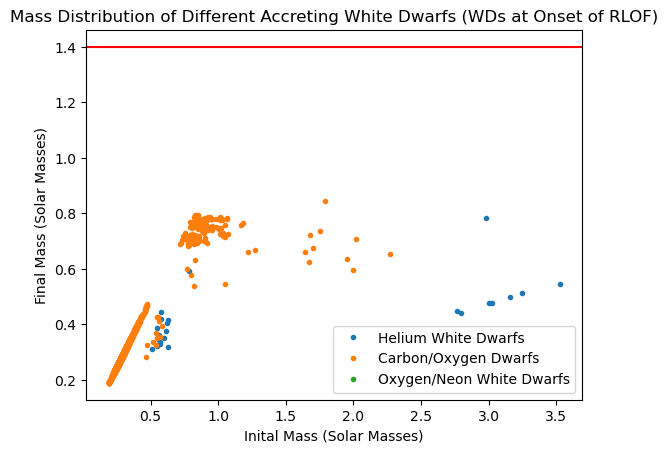

In [45]:
# looking for the indicies for these different stellar types

# where_wd = np.where((WD_types_LM==10) | (WD_types_LM==11) | (WD_types_LM==12))
where_wd_helium_2 = np.where((WD_types_LM_2==10)) #selecting the indiices of each specified inital state 
where_wd_co_2 = np.where((WD_types_LM_2==11))
where_wd_on_2 = np.where((WD_types_LM_2==12))

# getting each data slice of the different types of WDs
wd_helium_init_table_2 = RLOF_LM_table_2_accret[where_wd_helium_2]
wd_co_init_table_2 = RLOF_LM_table_2_accret[where_wd_co_2]
wd_on_init_table_2 = RLOF_LM_table_2_accret[where_wd_on_2]

plt.plot(wd_helium_init_table_2['Mass(1)<MT'], wd_helium_init_table_2['Mass(1)>MT'], '.',label='Helium White Dwarfs')
plt.plot(wd_co_init_table_2['Mass(1)<MT'], wd_co_init_table_2['Mass(1)>MT'],'.', label='Carbon/Oxygen Dwarfs')
plt.plot(wd_on_init_table_2['Mass(1)<MT'], wd_on_init_table_2['Mass(1)>MT'],'.' ,label='Oxygen/Neon White Dwarfs')
plt.axhline(1.4, color = 'r', linestyle = '-') 
plt.xlabel("Inital Mass (Solar Masses)")
plt.ylabel("Final Mass (Solar Masses)")
plt.title("Mass Distribution of Different Accreting White Dwarfs (WDs at Onset of RLOF)")
plt.legend()


In [ ]:
# looking for the indicies for these different final stellar types
where_wd_f_2 = np.where((WD_types_final_LM_2==10) | (WD_types_final_LM_2==11) | (WD_types_final_LM_2==12))
where_wd_helium_f_2 = np.where((WD_types_final_LM_2==10)) #selecting the indiices of each specified inital state 
where_wd_co_f_2 = np.where((WD_types_final_LM_2==11))
where_wd_on_f_2 = np.where((WD_types_final_LM_2==12))

# getting each data slice of the different types of WDs
wd_helium_final_table_2 = RLOF_LM_table_2_accret[where_wd_helium_f]
wd_co_final_table_2 = RLOF_LM_table_2_accret[where_wd_co_f]
wd_on_final_table_2 = RLOF_LM_table_2_accret[where_wd_on_f]

plt.plot(wd_helium_final_table_2['Mass(1)<MT'], wd_helium_final_table_2['Mass(1)>MT'], '.',label='Helium White Dwarfs')
plt.plot(wd_co_final_table_2['Mass(1)<MT'], wd_co_final_table_2['Mass(1)>MT'],'.', label='Carbon/Oxygen Dwarfs')
plt.plot(wd_on_final_table_2['Mass(1)<MT'], wd_on_final_table_2['Mass(1)>MT'],'.' ,label='Oxygen/Neon White Dwarfs')
plt.axhline(1.4, color = 'r', linestyle = '-') 
plt.xlabel("Inital Mass (Solar Masses)")
plt.ylabel("Final Mass (Solar Masses)")
plt.title("Mass Distribution of Different Accreting White Dwarfs (WDs After RLOF)")
plt.legend()

#b maybe some heavier stellar objects de-evolved and became WDs with lighter masses so these objects with more than 1.4 solar masses may not be WDs initally

In [25]:
# let's do this again but for the secondary star
# let's select the part of the table where we have the stellar types equal to WDs
wd_init_2_desind = np.where((RLOF_LM_table_2_accret['Stellar_Type(2)<MT']==10) | (RLOF_LM_table_2_accret['Stellar_Type(2)<MT']==11) | (RLOF_LM_table_2_accret['Stellar_Type(2)<MT']==12)) #the stellar types before the RLOF
RLOF_LM_wd_init_table_2 = RLOF_LM_table_2_accret[wd_init_2_desind]

wd_final_2_desind = np.where((RLOF_LM_table_2_accret['Stellar_Type(2)>MT']==10) | (RLOF_LM_table_2_accret['Stellar_Type(2)>MT']==11) | (RLOF_LM_table_2_accret['Stellar_Type(2)>MT']==12)) #the stellar types before the RLOF
RLOF_LM_wd_final_table_2 = RLOF_LM_table_2_accret[wd_final_2_desind]

In [26]:
# let's look the mass of these stellar types before and then after

wd_mass_init_2 = RLOF_LM_wd_init_table_2['Mass(2)<MT']
wd_mass_final_2 = RLOF_LM_wd_final_table_2['Mass(2)>MT']

# change in mass
wd_mass_change_1_init = RLOF_LM_wd_init_table_2['Mass(2)>MT'] - wd_mass_init_2
wd_mass_change_2_final = wd_mass_final_2 - RLOF_LM_wd_final_table_2['Mass(2)<MT'] #for the final states of the stars

# seeing if there even are any WDs that are past the Chandrasekhar Limit
print(np.where(wd_mass_init_2>=1.4))
print(np.where(wd_mass_final_2>=1.4))

(array([], dtype=int64),)
(array([], dtype=int64),)


/tmp/ipykernel_549309/3277731648.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('RdYlBu')


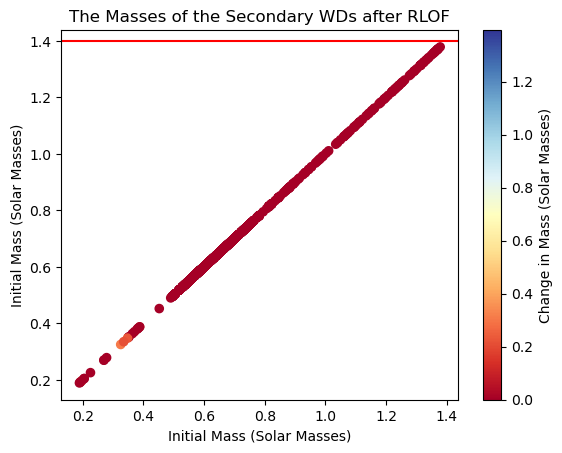

In [27]:
# inital secondary masses
# plotting for the inital mass of the primary WDs (help from the internet)
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(wd_mass_init_2, wd_mass_init_2, c=wd_mass_change_1_init, vmin=0, vmax=np.max(wd_mass_init_1), s=35, cmap=cm)
plt.colorbar(sc, label="Change in Mass (Solar Masses)")
plt.xlabel("Initial Mass (Solar Masses)")
plt.ylabel("Initial Mass (Solar Masses)")
plt.title("The Masses of the Secondary WDs after RLOF")
plt.axhline(1.4, color = 'r', linestyle = '-') 

/tmp/ipykernel_549309/2793915699.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('RdYlBu')


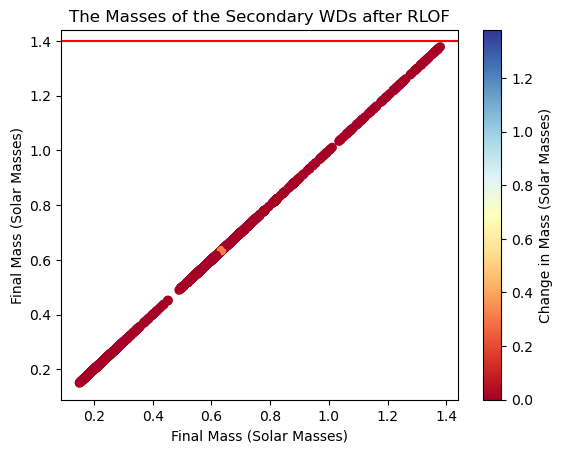

In [28]:
# let's now do the final masses
# plotting for the final mass of the secondary WDs (help from the internet)
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(wd_mass_final_2, wd_mass_final_2, c=wd_mass_change_2_final, vmin=0, vmax=np.max(wd_mass_final_2), s=35, cmap=cm)
plt.colorbar(sc, label="Change in Mass (Solar Masses)")
plt.xlabel("Final Mass (Solar Masses)")
plt.ylabel("Final Mass (Solar Masses)")
plt.title("The Masses of the Secondary WDs after RLOF")
plt.axhline(1.4, color = 'r', linestyle = '-') 

It seems that the final masses of the primary WDs are above the Chandrasekhar Limit, so there should be some Type Ia supernovae events but there aren't. I can now look at different properties of this subset of data to see what made them exceed the Chandrasekhar Limit.

Text(0.5, 1.0, 'The Mass and Period of the Primary Star Before RLOF')

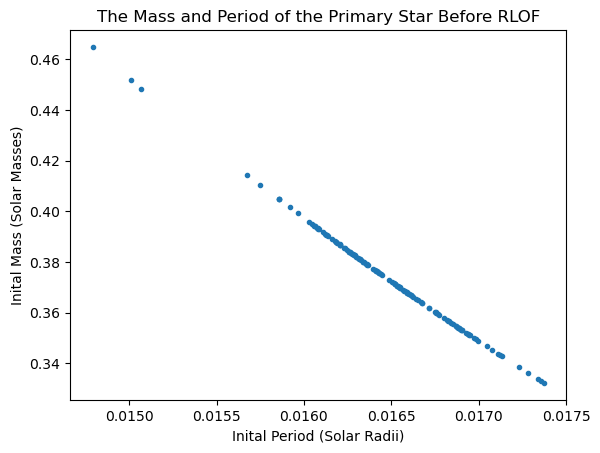

In [32]:
# let's look at the inital period of these WDs

init_period_1 = RLOF_LM_wd_final_table_types['Radius(1)<MT']
init_mass_init = RLOF_LM_wd_final_table_types['Mass(1)<MT']

plt.plot(init_period_1,init_mass_init,'.')
plt.xlabel("Inital Period (Solar Radii)")
plt.ylabel("Inital Mass (Solar Masses)")
plt.title("The Mass and Period of the Primary Star Before RLOF")



Text(0.5, 1.0, 'The Mass and Period of the Primary Star After RLOF')

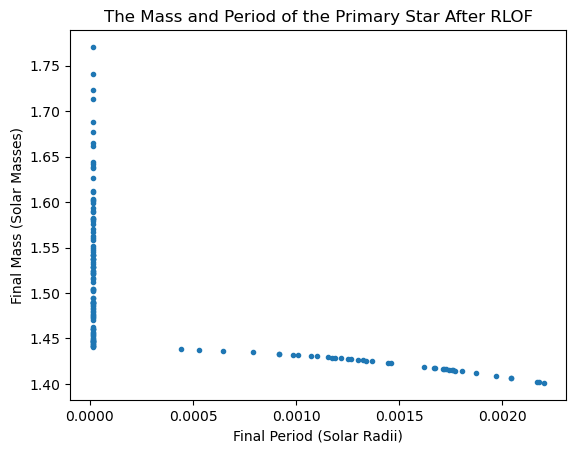

In [33]:
# now let's look at the final period and mass
final_period_1 = RLOF_LM_wd_final_table_types['Radius(1)>MT']
final_mass_init = RLOF_LM_wd_final_table_types['Mass(1)>MT']

plt.plot(final_period_1,final_mass_init,'.')
plt.xlabel("Final Period (Solar Radii)")
plt.ylabel("Final Mass (Solar Masses)")
plt.title("The Mass and Period of the Primary Star After RLOF")

Let's make a subset of data of just these WDs that did not experience a CE event and also have small radii

In [37]:
is_WD_stable =  RLOF_LM_wd_final_table_types['CEE>MT'] == 0 # stable mass transfer
is_small_radii = RLOF_LM_wd_final_table_types['Radius(1)>MT'] < 0.003 # small radius
RLOF_WD_STABLE = RLOF_LM_wd_final_table_types[is_WD_stable] #making the new table
RLOF_WD_STABLE = RLOF_LM_wd_final_table_types[is_small_radii]
RLOF_WD_STABLE

Beta,CEE>MT,Eccentricity<MT,Eccentricity>MT,Luminosity(1),Luminosity(2),MT_Event_Counter,Mass(1)<MT,Mass(1)>MT,Mass(2)<MT,Mass(2)>MT,MassTransferRateDonor,Merger,Metallicity@ZAMS(1),RLOF(1)<MT,RLOF(1)>MT,RLOF(2)<MT,RLOF(2)>MT,Radius(1)<MT,Radius(1)>MT,Radius(1)|RL<step,Radius(1)|RL>step,Radius(2)<MT,Radius(2)>MT,Radius(2)|RL<step,Radius(2)|RL>step,Record_Type,SEED,SemiMajorAxis<MT,SemiMajorAxis>MT,Stellar_Type(1)<MT,Stellar_Type(1)>MT,Stellar_Type(2)<MT,Stellar_Type(2)>MT,Teff(1),Teff(2),Time<MT,Time>MT,Zeta_Hurley(1),Zeta_Hurley(2),Zeta_Hurley_He(1),Zeta_Hurley_He(2),Zeta_Soberman(1),Zeta_Soberman(2),Zeta_Soberman_He(1),Zeta_Soberman_He(2)
float64,uint8,float64,float64,float64,float64,uint32,float64,float64,float64,float64,float64,uint8,float64,uint8,uint8,uint8,uint8,float64,float64,float64,float64,float64,float64,float64,float64,uint32,uint64,float64,float64,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1.0,0,0.0,0.0,0.00036709670599479065,76.66103657070684,2,0.35321860176764874,1.4480166027088313,1.2427714977981443,0.14797349685696173,0.25671330039601314,0,0.02433618689745945,0,0,0,1,0.016902031138489638,1.4285714285714285e-05,0.012096984057000205,1.1931457982486177e-06,2.4790216131433382,0.023954063134668347,1.002731658516623,0.005542484917758875,1,611830,5.043956712890345,20.77042782590607,10,10,2,10,211602.93119633012,110466.75951388064,5366.081746441814,5379.805740678238,0.0,0.0,-0.30990006127731345,0.0,0.0,0.0,0.046064533389899874,0.0
1.0,0,0.0,0.0,0.0002740828448970177,76.06241903956295,2,0.3811324053168883,1.454622667335866,1.2252404647201351,0.15175020270115738,0.255827833432674,0,0.02240669435373954,0,0,0,1,0.016318588533170805,1.4285714285714285e-05,0.011097045589588352,1.0907508909864723e-06,2.5212958473843026,0.023733138817871112,1.0089551656124311,0.004975886059166775,1,613275,5.182512771779855,22.78515264310417,10,10,2,10,196696.67604504272,110762.43152997555,5564.582648538762,5578.705954753327,0.0,0.0,-0.3057918417661144,0.0,0.0,0.0,0.07471010609513172,0.0
1.0,0,0.0,0.0,0.0004283094795269573,56.713310284199935,2,0.3826278824429397,1.5283679105072352,1.2956110809877983,0.1498710529235027,0.4144432539090675,0,0.01109669765816591,0,0,0,1,0.01628856494513003,1.4285714285714285e-05,0.011953945084016494,1.10182165840209e-06,2.395444813418362,0.023842201919860716,1.0107210941441842,0.005185071476495988,1,613800,4.868932491398044,22.36531637544156,10,10,2,10,219920.63414777053,102689.39754726154,3767.4605550788865,3777.3489029898547,0.0,0.0,-0.28599427298402696,0.0,0.0,0.0,0.05616356760622952,0.0
1.0,0,0.0,0.0,0.0004498476022826086,42.120134196928696,2,0.38088658876870496,1.4861334650432112,1.2658152156669542,0.16056833939244805,0.6356405654236762,0,0.004439665317082323,0,0,0,1,0.01632353491164975,1.4285714285714285e-05,0.010319787044419734,1.106962393203009e-06,2.7512211682133585,0.02324270755756928,1.0084101689854845,0.004871677535339871,1,621357,5.623956185729992,22.56129466884482,10,10,2,10,222634.7283488391,96550.96418142937,3418.4378942482426,3425.423562746683,0.0,0.0,-0.2670851111974357,0.0,0.0,0.0,0.0655809288884831,0.0
1.0,0,0.0,0.0,0.0005093245792513811,63.1414422154433,2,0.3713095436068492,1.4829555659387772,1.2775043214835573,0.1658582991516293,0.402242055941692,0,0.01126468057632948,0,0,0,1,0.016518791633073942,1.4285714285714285e-05,0.010213682459765783,1.1827136855627898e-06,2.8445298701065798,0.022964113605323713,1.0039911424866896,0.005066863095951719,1,624434,5.803723186306881,21.21912943110351,10,10,2,10,229654.63569076316,107480.90597351403,4101.4856930313035,4111.869201114928,0.0,0.0,-0.2863228498835541,0.0,0.0,0.0,0.056217526779995364,0.0
1.0,0,0.0,0.0,0.0003896840914658383,77.54197620822399,2,0.35389219456524756,1.4377060993243511,1.2409960363589059,0.15718213159980238,0.27118546119372905,0,0.0215332649418748,0,0,0,1,0.01688740344439802,0.0005302081258887306,0.011397567838717988,4.682258812004482e-05,2.6373826586652838,0

In [38]:
# you are saved no more excel sheet
RLOF_WD_STABLE = RLOF_WD_STABLE['CEE>MT','SEED','Mass(1)<MT', 'Mass(1)>MT', 'Mass(2)<MT', 'Mass(2)>MT','Metallicity@ZAMS(1)']
# np.savetxt('WD_STABLE_MT_RLOF.txt',RLOF_WD_STABLE, delimiter=',')

In [42]:
# let's get the properties of these WDs in system paramters
intesting_seeds = RLOF_WD_STABLE['SEED']

# reading in the SPs
SPs_LM = Data_2['BSE_System_Parameters']

#reading in the data as a table to make it more readable
SP_TABLE = Table(SPs_LM)
# SP_TABLE

In [43]:
# let's now only select the seeds in this table that overlap with RLOF table
overlap_seeds_bool = np.in1d(SP_TABLE['SEED'],intesting_seeds,assume_unique=True)

In [44]:
# reading in the sliced SPs table
WD_SPs_TABLE = SP_TABLE[overlap_seeds_bool]
WD_SPs_TABLE

Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity@ZAMS,Equilibrated_At_Birth,Error,Evolution_Status,Immediate_RLOF>CE,LBV_Factor,Mass@ZAMS(1),Mass@ZAMS(2),Merger,Merger_At_Birth,Metallicity@ZAMS(1),Metallicity@ZAMS(2),Omega@ZAMS(1),Omega@ZAMS(2),Optimistic_CE,Record_Type,SEED,SN_Kick_Magnitude_Random_Number(1),SN_Kick_Magnitude_Random_Number(2),SN_Kick_Mean_Anomaly(1),SN_Kick_Mean_Anomaly(2),SN_Kick_Phi(1),SN_Kick_Phi(2),SN_Kick_Theta(1),SN_Kick_Theta(2),SemiMajorAxis@ZAMS,Sigma_Kick_CCSN_BH,Sigma_Kick_CCSN_NS,Sigma_Kick_ECSN,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Unbound,WR_Factor
float64,float64,float64,uint32,uint8,uint8,float64,float64,float64,uint8,int32,int32,uint8,float64,float64,float64,uint8,uint8,float64,float64,float64,float64,uint8,uint32,uint64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,int32,int32,float64,uint8,float64
0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0,0,3,0,1.5,1.6729988511309755,1.2430072784858803,0,0,0.02433618689745945,0.02433618689745945,0.0,0.0,0,1,611830,0.6341094577219337,0.6917124066967517,5.559423848432576,3.7316917946847648,0.452822580077223,0.3603654286529947,6.083664388149593,3.36579471661993,0.5442305773591957,265.0,265.0,30.0,30.0,10,10,1,1,0.0,0,1.0
0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0,0,3,0,1.5,1.797777124610951,1.2255529254745814,0,0,0.02240669435373954,0.02240669435373954,0.0,0.0,0,1,613275,0.03186980448663235,0.7381867228541523,1.2969660567564492,0.7496416747733168,0.02963604209940862,-0.9090352158551136,2.0022352625297537,3.12860049421992,0.6916812867908037,265.0,265.0,30.0,30.0,10,10,1,1,0.0,0,1.0
0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0,0,3,0,1.5,1.8405188005620128,1.2956366492282696,0,0,0.01109669765816591,0.01109669765816591,0.0,0.0,0,1,613800,0.9057937315665185,0.9207624464761466,4.690584045973077,2.391552536985489,-0.8017907772761342,-0.6505343177198147,5.058233983702982,0.8718181559141611,0.5786593845113992,265.0,265.0,30.0,30.0,10,10,1,1,0.0,0,1.0
0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0,0,3,0,1.5,1.6386567577558797,1.2658774912981041,0,0,0.004439665317082323,0.004439665317082323,0.0,0.0,0,1,621357,0.8347127239685506,0.8772764566820115,3.0845121926680514,0.01120965074409083,0.9323469239272102,0.08834548530188124,4.26529842309697,6.136122522407161,0.3896993973344362,265.0,265.0,30.0,30.0,10,10,1,1,0.0,0,1.0
0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0,0,3,0,1.5,1.6244892507375417,1.2778969827581799,0,0,0.01126468057632948,0.01126468057632948,0.0,0.0,0,1,624434,0.1440996234305203,0.4071358973160386,0.06577889574932397,2.9284717751526164,-0.9212498458415325,0.24281044836458987,5.922941336635085,0.3346105619644297,0.5447994851036194,265.0,265.0,30.0,30.0,10,10,1,1,0.0,0,1.0
0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0,0,3,0,1.5,1.615397230157529,1.241374080799926,0,0,0.0215332649418748,0.0215332649418748,0.0,0.0,0,1,404626,0.9802102982066572,0.0012951535172760487,3.1054219075273193,0.3301244900272411,0.6492430126771471,0.03049987198685411,5.559732440760971,3.3515813805317167,0.5316231986133522,265.0,265.0,30.0,30.0,10,10,1,1,0.0,0,1.0
0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0,0,3,0,1.5,1.8221720923662463,1.1985045252641235,0,0,0.029691114700516132,0.029691114700516132,0.0,0.0,0,1,406404,0.17998999054543674,0.851655311184004,0.2433264780159275,1.1654947485858933,-0.003113288805037806,0.7238057632829427,2.988816987927234,2.0734176115145937,0.5685577121611333,265.0,265.0,30.0,30.0,10,10,1,1,0.0,0,1.0
0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0,0,3,0,1.5,1.8255939343883374,1.2686372903776064,0,0,0.02656663852984764,0.02656663852984764,0.0,0.0,0,1,406907,0.34397867135703564,0.14056240394711494,6.097774331039636,0.6708006629115695,-1.1730065356092854,-1.3706430564118228,4.51942626312441,2.265199370600368,0.8488850610971842,265.0,265.0,30.0,30.0,10,10,1,1,0.0,0,1.0
0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0,0,3,0,1.5,1.646928253513

In [45]:
# let's save this data as a txt file 
WD_SPs_TABLE = WD_SPs_TABLE['SEED','Mass@ZAMS(1)', 'Mass@ZAMS(2)', 'Metallicity@ZAMS(1)', 'Metallicity@ZAMS(2)','SemiMajorAxis@ZAMS']
np.savetxt('WD_STABLE_MT_SPs.txt',WD_SPs_TABLE, delimiter=',')

I there a trend of high metallicity with these WDs that have masses higher than 1.4 solar masses?

Text(0.5, 1.0, 'The Metallicities vs Initial Masses of WDs that Have Surrpassed the Chandrasekhar Limit')

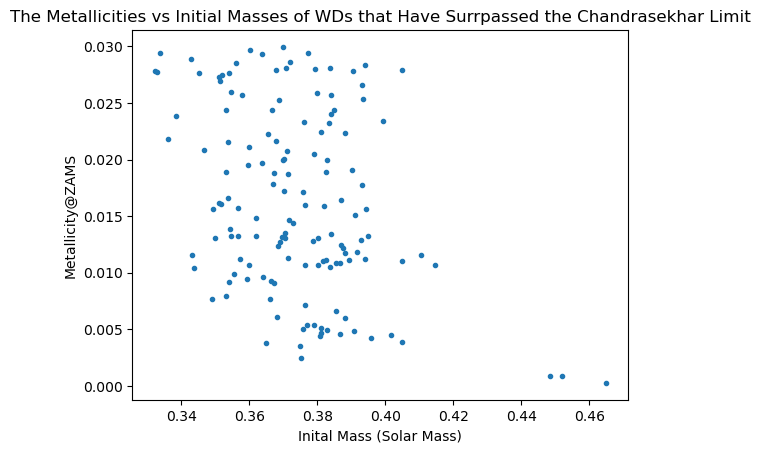

In [38]:
wd_chandra_metal = RLOF_LM_wd_final_table_types['Metallicity@ZAMS(1)']
init_chandra_mass = RLOF_LM_wd_final_table_types['Mass(1)<MT']


plt.plot(init_chandra_mass, wd_chandra_metal, '.')
plt.ylabel("Metallicity@ZAMS")
plt.xlabel("Inital Mass (Solar Mass)")
plt.title("The Metallicities vs Initial Masses of WDs that Have Surrpassed the Chandrasekhar Limit")

Text(0.5, 1.0, 'The Metallicities vs Final Masses of WDs that Have Surrpassed the Chandrasekhar Limit')

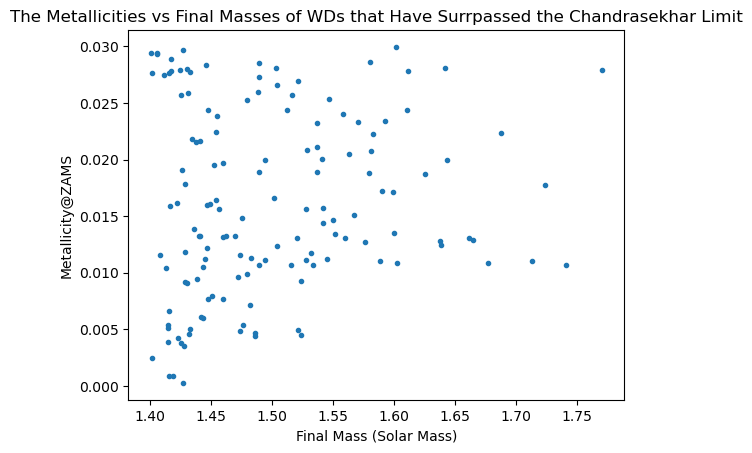

In [40]:
final_chandra_mass = RLOF_LM_wd_final_table_types['Mass(1)>MT']

plt.plot(final_chandra_mass, wd_chandra_metal, '.')
plt.ylabel("Metallicity@ZAMS")
plt.xlabel("Final Mass (Solar Mass)")
plt.title("The Metallicities vs Final Masses of WDs that Have Surrpassed the Chandrasekhar Limit")

In [41]:
# let's look at what type of WDs these stars are

chandra_stellar_types = RLOF_LM_wd_final_table_types
print(WD_types_LM_init.shape) #seeing how many different instances of this show up

# we can loop through each supernova to determine which event took place

# this may be silly but this is to be able to label each type of sn type using the legend

WD_types_LM_init_array = np.array(WD_types_LM_init)

# making empty lists to keep different types of star evolutions
wd_tot_i = []
wd_helium_i = []
wd_co_i =[]
wd_on_i = []

for wd in WD_types_LM_init_array:

    if wd == 10:
        wd_helium_i.append(wd)
        wd_tot_i.append(wd)

    elif wd == 11:
        wd_co_i.append(wd)
        wd_tot_i.append(wd)

    elif wd == 12:
        wd_on_i.append(wd)
        wd_tot_i.append(wd)

print("The number of primary stellar objects that were white dwarfs after RLOF = {}" .format(len(wd_tot_i)))
print("The number of primary stellar objects that were helium white dwarfs = {}" .format(len(wd_helium_i)))
print("The number of primary stellar objects that were carbon/oxygen white dwarfs = {}" .format(len(wd_co_i)))
print("The number of primary stellar objects that were oxygen/neon white dwarfs = {}" .format(len(wd_on_i)))

In [150]:
# let's look at final stellar types of these systems that have close to zero radii + if they merged
merge_desind = np.where(final_period_1<0.0002)
RLOF_LM_wd_final_merge = RLOF_LM_wd_final_table_period[merge_desind]
merge = RLOF_LM_wd_final_merge['Merger']

m_tot = []
m_1 = []
m_0 = []

for m in merge:
    if m == 0:
        m_0.append(m)
        m_tot.append(m)
    elif m == 1:
        m_1.append(m)
        m_tot.append(m)

print("Total amount of stars with radii close to zero=",len(m_tot))
print("Ended in merger=",len(m_1))
print("Did not end in merger=",len(m_0))

Total amount of stars with radii close to zero= 101
Ended in merger= 0
Did not end in merger= 101


Let's look at the parameters of the SN key and the RLOF key to see if there are any distinct overlapping keys

In [126]:
list(Data_2.keys()) 

['BSE_Common_Envelopes',
 'BSE_Double_Compact_Objects',
 'BSE_Pulsar_Evolution',
 'BSE_RLOF',
 'BSE_Supernovae',
 'BSE_System_Parameters',
 'Run_Details']

In [130]:
# now looking at the roche lobe overflow (mass transfer)
RLOF_LM = Data_2['BSE_RLOF']

#reading in the data as a table to make it more readable

RLOF_LM_table = Table(RLOF_LM)
RLOF_LM_table

Beta,CEE>MT,Eccentricity<MT,Eccentricity>MT,Luminosity(1),Luminosity(2),MT_Event_Counter,Mass(1)<MT,Mass(1)>MT,Mass(2)<MT,Mass(2)>MT,MassTransferRateDonor,Merger,Metallicity@ZAMS(1),RLOF(1)<MT,RLOF(1)>MT,RLOF(2)<MT,RLOF(2)>MT,Radius(1)<MT,Radius(1)>MT,Radius(1)|RL<step,Radius(1)|RL>step,Radius(2)<MT,Radius(2)>MT,Radius(2)|RL<step,Radius(2)|RL>step,Record_Type,SEED,SemiMajorAxis<MT,SemiMajorAxis>MT,Stellar_Type(1)<MT,Stellar_Type(1)>MT,Stellar_Type(2)<MT,Stellar_Type(2)>MT,Teff(1),Teff(2),Time<MT,Time>MT,Zeta_Hurley(1),Zeta_Hurley(2),Zeta_Hurley_He(1),Zeta_Hurley_He(2),Zeta_Soberman(1),Zeta_Soberman(2),Zeta_Soberman_He(1),Zeta_Soberman_He(2)
float64,uint8,float64,float64,float64,float64,uint32,float64,float64,float64,float64,float64,uint8,float64,uint8,uint8,uint8,uint8,float64,float64,float64,float64,float64,float64,float64,float64,uint32,uint64,float64,float64,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
4.144522123764924e-06,0,0.0,0.0,80.43004524184563,0.10544534344111112,1,0.8256165381191641,0.4611834061044192,0.5659603850097936,0.5659618954109719,7411.9034032836,0,0.0016000636446804315,0,1,0,0,119.8053651605664,0.014853187357341783,1.0100612011390113,0.00011931842482362293,0.517722473724366,0.517723783602549,0.005186203375411369,0.003787631536416959,1,900003,287.9011339411869,344.506740495443,3,10,0,0,141978.40276805413,4575.992781789945,7680.396683252381,7680.470736834791,0.0,-0.2399478638434796,0.0,-0.2399478638434796,0.0,-0.3333333333333333,0.0,-0.3333333333333333
0.000180045289035175,1,0.0,0.0,67.4163051971626,2.4507493333311063,1,1.3733315169808418,0.4848937726466166,1.0467411699949083,1.0467411699949083,4080.076594172305,0,0.0009079700166705884,0,1,0,0,87.65831277285689,0.014464663189015473,1.0145913325543974,0.004796800284255496,0.98519032745066,0.98519032745066,0.012908825363819435,0.23008305133608165,1,900008,214.58062365855403,9.583364185251547,3,10,1,1,137662.17010910538,7283.534658538805,2136.54639388222,2136.582587655694,0.0,-0.21728187798836937,0.0,-0.21728187798836937,0.0,-0.3333333333333333,0.0,-0.3333333333333333
1.0,1,0.0,0.0,3.2077856378207976e-05,28.778335310680333,2,0.4848937726466166,0.4848937726466166,1.0457422241252674,0.20698902941172218,1.6032742342694144,1,0.0009079700166705884,0,0,0,1,0.014464663189015473,0.014464663189015473,0.004792510096679771,0.7801109381741677,4.334884520578072,0.021110763599141918,1.011908718158736,1.6776725130004575,1,900008,9.589618752748802,0.04083329383986907,10,10,3,10,3615.5528102441604,92106.86133279861,5413.907595698666,5418.29690990891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0009252797489736876,1,0.0,0.0,99.91488651384013,0.020251109767654107,1,2.1303187037123124,0.3006077560425644,0.312391552616578,0.312391552616578,6.568770491588559,1,0.00026296535139415297,0,1,0,0,4.397725494007824,4.397725494007824,1.0872762302310262,276.42577603100955,0.2943996214956937,0.2943996214956937,0.1725164371337115,18.18266730691436,1,900009,7.393770105880393,0.04235726854262641,2,2,0,0,8711.060474930167,4017.1784177061654,632.5319865951622,632.8501634316941,0.0,-0.16358038873788983,0.0,-0.16358038873788983,0.0,-0.3333333333333333,0.0,-0.3333333333333333
0.348305484526812,0,0.0,0.0,67.49519382426843,1.7395944984595237,1,1.2298067827668793,0.1467918079177086,0.8155843792005366,1.19280443476517,0.2752193037883445,0,0.01805939637061457,0,1,0,0,2.365611538176128,0.024024625236980197,1.0045683283158877,0.001622985896640856,0.7688270931935459,1.1415910160756277,0.39382203591518217,0.030154910392256026,1,900010,5.675490351845762,67.4226897456997,2,10,1,1,106848.25622501946,6210.610206694499,5126.906503744681,5140.120180300723,0.0,-0.30066038218413504,0.0,-0.30066038218413504,0.0,-0.3333333333333333,0.0,-0.3333333333333333
1.0,1,0.0,0.0,1.552906004409779e-05,155.5641078948597,2,0.1467918079177086,0.1467918079177086,1.1674503262743623,0.3383283364508429,367.0455478036649,0,0.01805939637061457,0,0,0,1,0.024024625236980197,0.0

In [129]:
# now looking at the roche lobe overflow (mass transfer)
SN_LM = Data_2['BSE_Supernovae']

#reading in the data as a table to make it more readable

SN_LM_table = Table(SN_LM)
SN_LM_table

Applied_Kick_Magnitude(SN),ComponentSpeed(CP),ComponentSpeed(SN),Drawn_Kick_Magnitude(SN),Eccentricity,Eccentricity<SN,Experienced_RLOF(SN),Fallback_Fraction(SN),Is_Hydrogen_Poor(SN),Kick_Magnitude(uK),Luminosity(CP),Luminosity(SN),MT_Donor_Hist(SN),Mass(CP),Mass(SN),Mass@ZAMS(CP),Mass@ZAMS(SN),Mass_CO_Core@CO(SN),Mass_Core@CO(SN),Mass_He_Core@CO(SN),Mass_Total@CO(SN),Metallicity@ZAMS(1),Orb_Velocity<SN,Radius(CP),Radius(SN),Record_Type,SEED,SN_Kick_Mean_Anomaly(SN),SN_Kick_Phi(SN),SN_Kick_Theta(SN),SN_Orbit_Inclination_Angle,SN_Type(SN),SemiMajorAxis,SemiMajorAxis<SN,Stellar_Type(CP),Stellar_Type(SN),Stellar_Type_Prev(SN),Supernova_State,SystemicSpeed,Teff(CP),Teff(SN),Time,Unbound
float64,float64,float64,float64,float64,float64,uint8,float64,uint8,float64,float64,float64,bytes17,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,uint32,uint64,float64,float64,float64,float64,int32,float64,float64,int32,int32,int32,int32,float64,float64,float64,float64,uint8
636.2097881568486,19.06012742711217,1267.4930412906192,636.2097881568486,4954.84300302043,0.0,0,0.12104388650015185,0,49.07632086570804,54.09468022559894,2.9617943957502657,NA,2.7398653670700126,1.8021351895569786,2.7398653670700126,15.995827895126453,3.545170307457464,5.0319578433717345,5.0319578433717345,7.460674894258381,0.028168370455850612,12.963681403456604,2.0019206596627153,1.4374011786689665e-05,1,900007,6.1156426743221415,0.9557256598658075,2.4391413293982813,2.37265461715728,1,-2.201402677333859,11574.10360374357,1,13,5,1,510.86821952735454,11074.974788028314,1999296.777302393,12.400931978079747,1
307.64729114593075,11.571523174398255,618.8749684885928,307.64729114593075,1536.7641734163512,0.0,0,0.08318871229398678,0,32.6125736734974,5871.168054192186,3.2350511956907932,NA,8.740896288122087,2.057201078641393,8.740987469171376,14.48169643240489,3.712185280670351,5.247242224953382,5.247242224953382,14.217699647651825,0.0001118364187846853,9.433395052655419,2.9809959030997364,1.4374011786689665e-05,1,900015,3.0086987599914155,-0.7328371759856367,5.899152846228975,0.5945198862082146,1,-21.077333359083134,49196.04270851978,1,13,5,1,113.19843190765245,29293.952690149403,2043896.164425742,16.234446767509258,1
328.3172731538792,618.8749684885928,348.22120443197866,328.3172731538792,1536.7641734163512,1536.7641734163512,0,0.026790685504594222,0,nan,9.257131241452831e-05,2.354811768234117,NA,2.057201078641393,1.2775835252086558,14.48169643240489,8.740987469171376,1.9551474090814565,2.9793618053669557,2.9793618053669557,8.665281168923537,0.0001118364187846853,nan,1.4374011786689665e-05,1.4374011786689665e-05,1,900015,4.158730817042712,0.21669498141767374,5.894405776540182,0.5945198862082146,1,-21.228680559470398,-21.228680559470398,13,13,5,2,113.19843190765245,149488.45191635052,1887893.923293176,34.92845236944442,1
51.26649618880825,19.67210193986108,19.67210193986108,51.26649618880825,0.1794290357045332,0.0,1,0.0,1,0.36998324832433194,1110.2302286130148,2.354811768234117,2-8,5.5830486395549945,1.2775835252086558,4.6437400790410575,10.475716184875113,1.415641740710856,1.415641740710856,1.415641740710856,1.415641740710856,0.00037953371804145256,138.56437128166246,2.1228879480552636,1.4374011786689665e-05,1,900024,6.15256992165593,-0.1833194365767763,1.2721287286963265,0.3416935609961388,16,81.58829110628453,69.50795631285445,1,13,8,1,19.67210193986108,22891.131684569613,1887893.923293176,27.420172113123016,0
876.3287996949855,125.42950713772821,1798.7741492175824,876.3287996949855,39.49568266972658,0.0,1,0.12193105762084161,1,5.406332133471837,469.44756878758966,2.354811768234117,5,4.317973212125089,1.2775835252086558,4.318074707492136,8.527888595427456,1.8515772305638754,1.8515772305638754,2.8402711819487583,2.8402711819487583,0.0011495527374058069,162.0930379525582,2.045607768100428,1.4374011786689665e-05,1,900034,1.4496981040535568,-0.9674338009384359,4.13075839409616,0.9894353146258009,1,-1.245640421333852,51.9515713224601,1

In [ ]:
# one column that overlapps or seems to is Teff (temperature) so let's use thise to look at the sn types of the WDs that went above 1.4 solar masses

# let's take the indicies of 

It seems that the radius of the primary is zero above the Chandrasekhar limit so there should be some type Type Ia supernova but there's not?

Text(0, 0.5, 'Inital Semi-Major Axis (Solar Radii)')

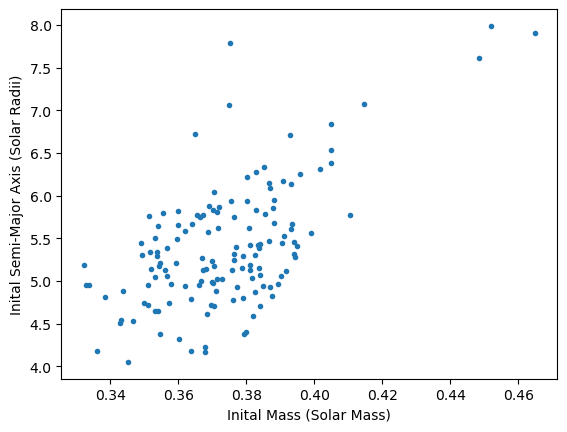

In [29]:
# let's now look at the semi-major axis evolution to see if maybe ther should be a merger

init_semi_major = RLOF_LM_wd_final_table_period['SemiMajorAxis<MT']

plt.plot(init_mass_init,init_semi_major,'.')
plt.xlabel("Inital Mass (Solar Mass)")
plt.ylabel("Inital Semi-Major Axis (Solar Radii)")



Text(0, 0.5, 'Final Semi-Major Axis (Solar Radii)')

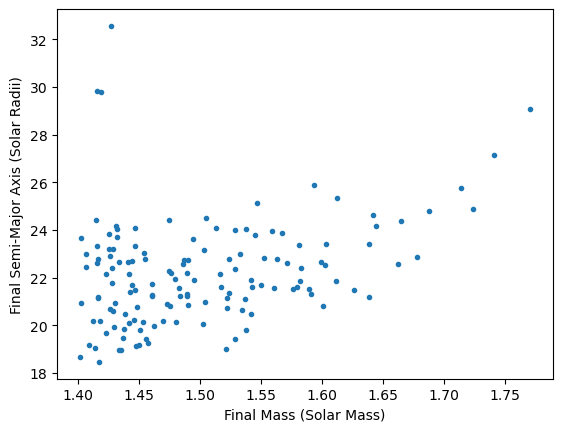

In [30]:
final_semi_major = RLOF_LM_wd_final_table_period['SemiMajorAxis>MT']

plt.plot(final_mass_init,final_semi_major,'.')
plt.xlabel("Final Mass (Solar Mass)")
plt.ylabel("Final Semi-Major Axis (Solar Radii)")

In [41]:
list(Data_2.keys()) 

['BSE_Common_Envelopes',
 'BSE_Double_Compact_Objects',
 'BSE_Pulsar_Evolution',
 'BSE_RLOF',
 'BSE_Supernovae',
 'BSE_System_Parameters',
 'Run_Details']

In [45]:
SPs_2 = Data_2['BSE_System_Parameters'] #specifically looking at the supernovae events
list(SPs_2.keys()) #listing the parameters recorded for each supernova

['Applied_Kick_Magnitude(1)',
 'Applied_Kick_Magnitude(2)',
 'CE_Alpha',
 'CE_Event_Counter',
 'CH_on_MS(1)',
 'CH_on_MS(2)',
 'Drawn_Kick_Magnitude(1)',
 'Drawn_Kick_Magnitude(2)',
 'Eccentricity@ZAMS',
 'Equilibrated_At_Birth',
 'Error',
 'Evolution_Status',
 'Immediate_RLOF>CE',
 'LBV_Factor',
 'Mass@ZAMS(1)',
 'Mass@ZAMS(2)',
 'Merger',
 'Merger_At_Birth',
 'Metallicity@ZAMS(1)',
 'Metallicity@ZAMS(2)',
 'Omega@ZAMS(1)',
 'Omega@ZAMS(2)',
 'Optimistic_CE',
 'Record_Type',
 'SEED',
 'SN_Kick_Magnitude_Random_Number(1)',
 'SN_Kick_Magnitude_Random_Number(2)',
 'SN_Kick_Mean_Anomaly(1)',
 'SN_Kick_Mean_Anomaly(2)',
 'SN_Kick_Phi(1)',
 'SN_Kick_Phi(2)',
 'SN_Kick_Theta(1)',
 'SN_Kick_Theta(2)',
 'SemiMajorAxis@ZAMS',
 'Sigma_Kick_CCSN_BH',
 'Sigma_Kick_CCSN_NS',
 'Sigma_Kick_ECSN',
 'Sigma_Kick_USSN',
 'Stellar_Type(1)',
 'Stellar_Type(2)',
 'Stellar_Type@ZAMS(1)',
 'Stellar_Type@ZAMS(2)',
 'SystemicSpeed',
 'Unbound',
 'WR_Factor']

In [46]:
# let's now look at if the evolution of the wd was interruted or not to see why there may not be a type Ia supernova event

# now looking at the roche lobe overflow (mass transfer)
SPs_LM = Data_2['BSE_System_Parameters']

#reading in the data as a table to make it more readable

SPs_LM_table = Table(SPs_LM)
SPs_LM_table


Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity@ZAMS,Equilibrated_At_Birth,Error,Evolution_Status,Immediate_RLOF>CE,LBV_Factor,Mass@ZAMS(1),Mass@ZAMS(2),Merger,Merger_At_Birth,Metallicity@ZAMS(1),Metallicity@ZAMS(2),Omega@ZAMS(1),Omega@ZAMS(2),Optimistic_CE,Record_Type,SEED,SN_Kick_Magnitude_Random_Number(1),SN_Kick_Magnitude_Random_Number(2),SN_Kick_Mean_Anomaly(1),SN_Kick_Mean_Anomaly(2),SN_Kick_Phi(1),SN_Kick_Phi(2),SN_Kick_Theta(1),SN_Kick_Theta(2),SemiMajorAxis@ZAMS,Sigma_Kick_CCSN_BH,Sigma_Kick_CCSN_NS,Sigma_Kick_ECSN,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Unbound,WR_Factor
float64,float64,float64,uint32,uint8,uint8,float64,float64,float64,uint8,int32,int32,uint8,float64,float64,float64,uint8,uint8,float64,float64,float64,float64,uint8,uint32,uint64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,int32,int32,float64,uint8,float64
0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0,0,3,0,1.5,1.3283996720870594,0.882687638005253,0,0,0.004487611028747218,0.004487611028747218,0.0,0.0,0,1,900000,0.15434140246361494,0.6934823617339134,0.9712299888846055,2.679065643666147,0.11192382115068078,-0.5314182751065577,1.8281702064900605,0.7412667101509953,35.49559865522572,265.0,265.0,30.0,30.0,11,11,1,1,0.0,0,1.0
0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0,0,3,0,1.5,2.0220250434469254,1.0641540412223531,0,0,0.027780354231953172,0.027780354231953172,0.0,0.0,0,1,900001,0.954801702639088,0.9425433448050171,1.0592930417499484,0.35840551407969595,0.5418321412099627,0.9888221570384301,5.028768911793038,5.274911818713106,120.15440915191046,265.0,265.0,30.0,30.0,11,11,1,1,0.0,0,1.0
0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0,0,3,0,1.5,1.5364484453391714,1.3980966760608509,0,0,0.008524552565213667,0.008524552565213667,0.0,0.0,0,1,900002,0.34548651380464435,0.44101438904181123,5.374212766881896,4.612627732356849,0.6561688107859962,0.00746289396866695,5.958445170529418,6.225057117495736,160.40270782507386,265.0,265.0,30.0,30.0,11,11,1,1,0.0,0,1.0
0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0,0,3,0,1.5,0.9717694707932819,0.5659603850097936,0,0,0.0016000636446804315,0.0016000636446804315,0.0,0.0,0,1,900003,0.8808047617785633,0.10477456450462341,5.662423362181468,2.4855261387689187,-1.0230355918120357,0.1266613952749478,2.10473105115933,1.0570043663945763,1.211484039071418,265.0,265.0,30.0,30.0,10,0,1,0,0.0,0,1.0
0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0,0,3,0,1.5,2.5254897709965802,1.456961299924082,0,0,0.010712012980824344,0.010712012980824344,0.0,0.0,0,1,900004,0.1734036598354578,0.423496212111786,0.05671341916440766,4.415918357547529,0.7297735810978665,-0.9688259680180739,4.465642524667249,1.1905690342648234,132.45623878061986,265.0,265.0,30.0,30.0,11,11,1,1,0.0,0,1.0
0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0,0,3,0,1.5,0.9738995826139937,0.14963324181027216,0,0,0.00044778451022546594,0.00044778451022546594,0.0,0.0,0,1,900005,0.9765084215905517,0.025380379520356655,3.333822176789597,5.517736995664975,1.1228226072182115,1.0908126828790876,3.50319685853066,0.6529127048234574,1.7697833975543937,265.0,265.0,30.0,30.0,11,0,1,0,0.0,0,1.0
0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0,0,3,0,1.5,1.0373156293817731,0.9509881166584517,0,0,0.0011569074621764295,0.0011569074621764295,0.0,0.0,0,1,900006,0.3155034191440791,0.030249588657170534,0.6298627349625494,3.296793737949348,0.4617475484337721,0.7536161948591049,4.479074514746408,0.867002475367451,6.903570653683481,265.0,265.0,30.0,30.0,11,11,1,1,0.0,0,1.0
636.2097881568486,0.0,1.0,0,0,0,636.2097881568486,0.0,0.0,0,0,3,0,1.5,15.995827895126453,2.7398653670700126,0,0,0.028168370455850612,0.028168370455850612,0.0,0.0,0,1,900007,0.876315290806815,0.8813622565940022,6.1156426743221415,4.733061879528203,0.9557256598658075,1.448822891115332,2.4391413293982813,4.083584899256465,29.044392811103094,265.0,265.0,30.0,30.0,13,11,1,1,510.86821952735454,1,1.0
0.0,0

In [54]:
# let's look at the evolution status and the WDs that passed 1.4 solar masses

# making sure we are only looking at WDs
SPs_LM_table_evo = SPs_LM_table[np.where(((SPs_LM_table['Stellar_Type(1)']==10) | (SPs_LM_table['Stellar_Type(1)']==11) | (SPs_LM_table['Stellar_Type(1)']==12)) & ((SPs_LM_table['Stellar_Type(2)']==10) | (SPs_LM_table['Stellar_Type(2)']==11) | (SPs_LM_table['Stellar_Type(2)']==12)))]

# let's look at the evolution type now
evos_status = SPs_LM_table_evo['Evolution_Status']

Text(0, 0.5, 'Mass of the Primary Star (@ZAMS)')

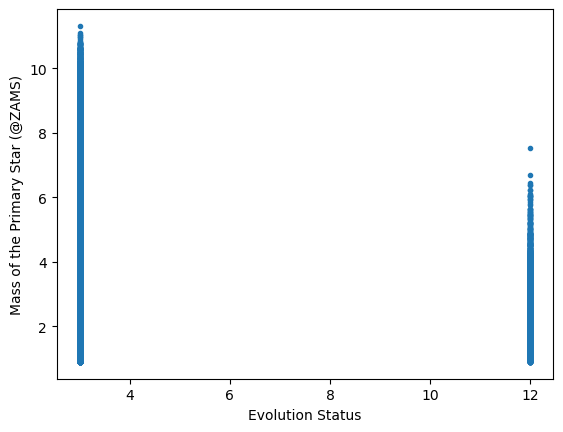

In [62]:
plt.plot(evos_status, SPs_LM_table_evo['Mass@ZAMS(1)'],'.')
plt.xlabel("Evolution Status")
plt.ylabel("Mass of the Primary Star (@ZAMS)")

In [71]:
# looking for the actual list of supernovae types 
print(evos_status.shape) #seeing how many different instances of this show up
evos_status_array = np.array(evos_status)

# we can loop through each supernova to determine which event took place

# setting what I will make the counters equal to zero
ES_1 = 0
ES_2 = 0
ES_3 = 0
ES_4 = 0
ES_5 = 0
ES_6 = 0
ES_7 = 0
ES_8 = 0
ES_9 = 0
ES_10 = 0
ES_11 = 0
ES_12 = 0
ES_13 = 0
ES_14 = 0
ES_15 = 0
ES_16 = 0
ES_17 = 0

#looping through the supernova events and adding to the counters for each occurence

for evos in evos_status_array:
    if evos==1:
        ES_1+=1
    elif evos==2:
        ES_2+=1
    elif evos==3:
        ES_3+=1
    elif evos==4:
        ES_4+=1
    elif evos==5:
        ES_5+=1
    elif evos==6:
        ES_6+=1
    elif evos==7:
        ES_7+=1
    elif evos==8:
        ES_8+=1
    elif evos==9:
        ES_9+=1
    elif evos==10:
        ES_10+=1
    elif evos==11:
        ES_11+=1
    elif evos==12:
        ES_12+=1
    elif evos==13:
        ES_13+=1
    elif evos==14:
        ES_14+=1
    elif evos==15:
        ES_15+=1
    elif evos==16:
        ES_16+=1
    elif evos==17:
        ES_17+=1

#printing the final number of each type of supernova

print("Simulation completed=",ES_1)
print("Evolution stopped because an error occurred=",ES_2)
print("Allowed time exceeded=",ES_3)
print("Allowed timesteps exceeded=",ES_4)
print("No user-provided timesteps read=",ES_5)
print("User-provided timesteps exhausted=",ES_6)
print("User-provided timesteps not consumed=",ES_7)
print("SSE error for one of the constituent stars=",ES_8)
print("Error evolving binary=",ES_9)
print("Time exceeded DCO merger time=",ES_10)
print("Stars touching=",ES_11)
print("Stars merged=",ES_12)
print("Stars merged at birth=",ES_13)
print("DCO formed=",ES_14)
print("Double White Dwarf formed=",ES_15)
print("Massless Remnant formed=",ES_16)
print("Unbound binary=",ES_17)


(332389,)
Simulation completed= 0
Evolution stopped because an error occurred= 0
Allowed time exceeded= 326105
Allowed timesteps exceeded= 0
No user-provided timesteps read= 0
User-provided timesteps exhausted= 0
User-provided timesteps not consumed= 0
SSE error for one of the constituent stars= 0
Error evolving binary= 0
Time exceeded DCO merger time= 0
Stars touching= 0
Stars merged= 6284
Stars merged at birth= 0
DCO formed= 0
Double White Dwarf formed= 0
Massless Remnant formed= 0
Unbound binary= 0


In [72]:
# let's look at the inital mass ratio
mass_1_array = np.array(SPs_LM_table['Mass@ZAMS(1)'])
mass_2_array = np.array(SPs_LM_table['Mass@ZAMS(2)'])

mass_ratio = mass_2_array/mass_1_array


Text(0, 0.5, 'Number of Binaries')

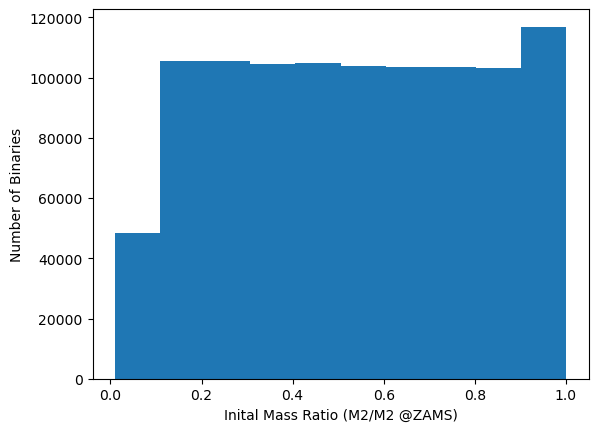

In [125]:
plt.hist(mass_ratio,bins=10);
plt.xlabel("Inital Mass Ratio (M2/M2 @ZAMS)")
plt.ylabel("Number of Binaries")

In [5]:
RLOF_LM_wd_final_table_radii

NameError: name 'RLOF_LM_wd_final_table_radii' is not defined

Below is looking at if the star experienced RLOF in the current time step

In [17]:
# let's make a new dataset only to encompass where the primary star experinced RLOF

RLOF_desind_1 = np.where((RLOF_LM_table['RLOF(1)>MT']>=1)) 

# RLOF_desind_1 = np.where((RLOF_LM_table['RLOF(1)>MT']>=1) | (RLOF_LM_table['RLOF(1)<MT']>=1)) #if the star experinced RLOF in the curretn time step + previous time step (inclusive OR)

RLOF_LM_table_1 = RLOF_LM_table[RLOF_desind_1]
# RLOF_LM_table_1

In [18]:
# we want to see if the accretor (star 2) is a white dwarf 

# naming each column something i can reference more easily
stellar_type_2_LM = np.array(RLOF_LM_table_1['Stellar_Type(2)<MT']) #getting the stellar type of the secondary star at the onset of RLOF

# making empty lists to keep different types of star evolutions
wd = []
wd_helium = []
wd_co =[]
wd_on = []

for stars in stellar_type_2_LM:

    if stars == 10:
        wd_helium.append(stars)
        wd.append(stars)

    elif stars == 11:
        wd_co.append(stars)
        wd.append(stars)

    elif stars == 12:
        wd_on.append(stars)
        wd.append(stars)

print("The number of primary stellar objects that were intially white dwarfs at the onset of RLOF = {}" .format(len(wd)))
print("The number of primary stellar objects that were intially helium white dwarfs = {}" .format(len(wd_helium)))
print("The number of primary stellar objects that were intially carbon/oxygen white dwarfs = {}" .format(len(wd_co)))
print("The number of primary stellar objects that were intially oxygen/neon white dwarfs = {}" .format(len(wd_on)))



The number of primary stellar objects that were intially white dwarfs at the onset of RLOF = 2793
The number of primary stellar objects that were intially helium white dwarfs = 23
The number of primary stellar objects that were intially carbon/oxygen white dwarfs = 2762
The number of primary stellar objects that were intially oxygen/neon white dwarfs = 8


In [101]:
# i now want to see what these stars evolved into 

# i want to look at all of the white dwarf 
where_wd = np.where((stellar_type_2_LM==10) | (stellar_type_2_LM==11) | (stellar_type_2_LM==12))
where_wd_helum = np.where((stellar_type_2_LM==10)) #selecting the indiices of each specified inital state 
where_wd_co = np.where((stellar_type_2_LM==11))
where_wd_on = np.where((stellar_type_2_LM==12))

# let's use these indicies to look at what the final stellar states of these white dwarfs are
final_star_2 = np.array(RLOF_LM_table_1['Stellar_Type(2)>MT'])

# the total number of wd that reamined as wd
final_wd_2 = final_star_2[where_wd]
final_wd_loc = np.where((final_wd_2==10) | (final_wd_2==11) | (final_wd_2==12))
final_wd_state = final_wd_2[final_wd_loc]
print("The number of white dwarfs that remained as white dwarfs = {}" .format(len(final_wd_state)))

# seeing what the helum white dwarfs ended up as 
# finding the indicies where it was originally a white dwarf and now seeing what state it ended up being in after RLOF
final_wd_helium_2 = final_star_2[where_wd_helum] 

helium_final_loc = np.where(final_wd_helium_2==10) # where these final states remained as helium wd
helium_final_state = final_wd_helium_2[helium_final_loc] # getting the values at these indicies

# seeing if they all stayed the same type after RLOF
print("The number of helium white dwarfs that remained as helium white dwarfs = {}" .format(len(helium_final_state)))

#seeing if some of the missing helium whit dwarfs became a naked helium main sequence 
hel_to_ms_loc = np.where(final_wd_helium_2==7)
hel_to_ms_state = final_wd_helium_2[hel_to_ms_loc]

# path possible with mass gain or loss
print("The number of helium white dwarfs that became a naked helium main sequence star = {}" .format(len(hel_to_ms_state)))

#seeing if some of the missing helium whit dwarfs became a naked helium (sub) giant
hel_to_naked_loc = np.where(final_wd_helium_2==8)
hel_to_naked_state = final_wd_helium_2[hel_to_naked_loc]

# path possible with mass gain or loss
print("The number of helium white dwarfs that became a naked helium (sub) giant = {}" .format(len(hel_to_naked_state)))

#seeing if some of the missing helium whit dwarfs became no stellar remnant
hel_to_none_loc = np.where(final_wd_helium_2==15)
hel_to_none_state = final_wd_helium_2[hel_to_none_loc]

# path possible with mass gain or loss
print("The number of helium white dwarfs that became no stellar remnant = {}" .format(len(hel_to_none_state)))




# what the carbon oxygen white dwarfs ended up as
final_wd_co_2 = final_star_2[where_wd_co]
co_final_loc = np.where(final_wd_co_2==11)
co_final_state = final_wd_co_2[co_final_loc]

# seeing if they all stayed the same type after RLOF
print("The number of carbon/oxygen white dwarfs that remained as carbon/oxygen white dwarfs = {}" .format(len(co_final_state)))




# what the oxygen neon white dwarfs ended as 
final_wd_on_2 = final_star_2[where_wd_on]
on_final_loc = np.where(final_wd_on_2==12)
on_final_state = final_wd_on_2[on_final_loc]

# seeing if they all stayed the same type after RLOF
print("The number of oxygen/neon white dwarfs that remained as oxygen/neon white dwarfs = {}" .format(len(on_final_state)))



The number of white dwarfs that remained as white dwarfs = 2784
The number of helium white dwarfs that remained as helium white dwarfs = 14
The number of helium white dwarfs that became a naked helium main sequence star = 1
The number of helium white dwarfs that became a naked helium (sub) giant = 7
The number of helium white dwarfs that became no stellar remnant = 1
The number of carbon/oxygen white dwarfs that remained as carbon/oxygen white dwarfs = 2762
The number of oxygen/neon white dwarfs that remained as oxygen/neon white dwarfs = 8


The mass of the helium white dwarf before it experinced RLOF was = [0.27854691 0.38737054 0.34995143 0.19741588 0.22541611 0.19267069
 0.19267069 0.37919463 0.36342677 0.20464278 0.19137082 0.38317993
 0.35129958 0.35220962 0.34766029 0.38217014 0.32506399 0.37036777
 0.18902463 0.49002248 0.20421209 0.33497561 0.3876901 ] Solar Masses.
The mass of the helium white dwarf after it experinced RLOF was = [0.27854691 0.61202524 0.59023831 0.19741588 0.22541611 0.19267069
 0.38436674 0.37919463 0.36342677 0.20464278 0.19137082 0.38317993
 0.35129958 0.         0.57785371 0.38217014 0.63399407 0.37036777
 0.18902463 0.49002248 0.20421209 0.55019182 0.3876901 ] Solar Masses.


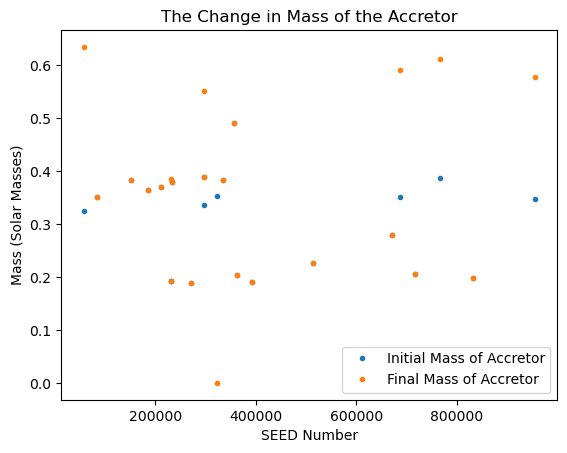

In [93]:
# let's look at the mass of the accretor (the secondary star that is having mass donated by the first star)
wd_init_mass_2 = np.array(RLOF_LM_table_1['Mass(2)<MT'])
wd_accret_init_2 = wd_init_mass_2[where_wd_helum]
print("The mass of the helium white dwarf before it experinced RLOF was = {} Solar Masses." .format(wd_accret_init_2))

wd_final_mass_2 = np.array(RLOF_LM_table_1['Mass(2)>MT'])
wd_accret_final_2 = wd_final_mass_2[where_wd_helum]
print("The mass of the helium white dwarf after it experinced RLOF was = {} Solar Masses." .format(wd_accret_final_2))

#getting the seed number just to have soemthing to plot against
seed_num = np.array(RLOF_LM_table_1['SEED'])
seed_num_wd = seed_num[where_wd_helum]

# if i want to add labels for the seed number
# fig = plt.figure(figsize=(10,8))
# ax = fig.add_subplot(111)

# z=[]
# for seeds in seed_num_wd:
#     z.append(str(seeds))

plt.plot(seed_num_wd,wd_accret_init_2,'.', label="Initial Mass of Accretor")
plt.plot(seed_num_wd,wd_accret_final_2,'.', label="Final Mass of Accretor")
plt.xlabel("SEED Number")
plt.ylabel("Mass (Solar Masses)")
plt.title("The Change in Mass of the Accretor")
plt.legend()

# for i,txt in enumerate(z):
#     ax.text(seed_num_wd[i],wd_accret_init_2[i],txt)

# for i,txt in enumerate(z):
#     ax.text(seed_num_wd[i],wd_accret_final_2[i],txt)

In [90]:
# finding where the mass actually changed? idk what is happening here - because there are mroe changed than the previous array??

# init_mass_2 = []
# final_mass_2 = []

# # looping through the white dwarf's mass
# for wd_init in wd_accret_init_2:
#     for wd_final in wd_accret_final_2:
#         if wd_init!=wd_final:
#             init_mass_2.append(wd_init)
#             final_mass_2.append(wd_final)


# print("The number of helium white dwarfs that actually changed mass due to RLOF was = {}" .format(len(final_mass_2)))
# print("The mass of the helium white dwarf before it experinced RLOF and changed mass was = {}" .format(init_mass_2))
# print("The mass of the helium white dwarf after it experinced RLOF and changed mass was = {}" .format(final_mass_2))


Let's do the same for the secondary star!

In [163]:
# let's make a new dataset only to encompass where the primary star experinced RLOF

RLOF_desind_2 = np.where(RLOF_LM_table['RLOF(2)>MT']>=1)

RLOF_LM_table_2 = RLOF_LM_table[RLOF_desind_2]
# RLOF_LM_table_2

In [165]:
# counting if there are any white dwarfs from the RLOF key

# naming each column something i can reference more easily
stellar_type_2_LM = np.array(RLOF_LM_table_2['Stellar_Type(2)<MT'])

# making empty lists to keep different types of star evolutions
wd_2 = []
wd_helium_2 = []
wd_co_2 =[]
wd_on_2 = []

for stars_2 in stellar_type_2_LM:

    if stars_2 == 10:
        wd_helium_2.append(stars)
        wd_2.append(stars)

    elif stars_2 == 11:
        wd_co_2.append(stars)
        wd_2.append(stars)

    elif stars_2 == 12:
        wd_on_2.append(stars)
        wd_2.append(stars)

print("The number of secondary stellar objects that were initally white dwarfs = {}" .format(len(wd_2)))
print("The number of secondary stellar objects that were initally helium white dwarfs = {}" .format(len(wd_helium_2)))
print("The number of secondary stellar objects that were initally carbon/oxygen white dwarfs = {}" .format(len(wd_co_2)))
print("The number of secondary stellar objects that were initally oxygen/neon white dwarfs = {}" .format(len(wd_on_2)))

The number of secondary stellar objects that were initally white dwarfs = 0
The number of secondary stellar objects that were initally helium white dwarfs = 0
The number of secondary stellar objects that were initally carbon/oxygen white dwarfs = 0
The number of secondary stellar objects that were initally oxygen/neon white dwarfs = 0


In [168]:
# # i now want to see what these stars evolved into 

# # i want to look at all of the white dwarf 
# where_wd_helum_2 = np.where((stellar_type_2_LM==10)) #selecting the indiices of each specified inital state 
# where_wd_co_2 = np.where((stellar_type_2_LM==11))
# where_wd_on_2 = np.where((stellar_type_2_LM==12))

# # let's use these indicies to look at what the final stellar states of these white dwarfs are, this is the "Stellar_Type(2)>MT" column
# final_star_2 = np.array(RLOF_LM_table_2['Stellar_Type(2)>MT'])

# # seeing what the helum white dwarfs ended up as 
# # finding the indicies where it was originally a white dwarf and now seeing what state it ended up being in after RLOF
# final_wd_helium_2 = final_star_2[where_wd_helum_2] 

# helium_final_loc_2 = np.where(final_wd_helium_2==10) # where these final states remained as helium wd
# helium_final_state_2 = final_wd_helium_2[helium_final_loc_2] # getting the values at these indicies

# print("The number of helium white dwarfs that remained as helium white dwarfs = {}" .format(len(helium_final_state_2)))

# hel_to_ms_loc_2 = np.where(final_wd_helium_2==7) # where these final states became naked helium main sequence 
# hel_to_ms_state_2 = final_wd_helium_2[hel_to_ms_loc_2] # getting the values at these indicies

# print("The number of helium white dwarfs that became a naked helium main sequence star = {}" .format(len(hel_to_ms_state_2)))

# #seeing if some of the missing helium whit dwarfs became a naked helium (sub) giant (possible with mass gain or loss)
# hel_to_naked_loc_2 = np.where(final_wd_helium_2==8)
# hel_to_naked_state_2 = final_wd_helium_2[hel_to_naked_loc_2]

# print("The number of helium white dwarfs that became a naked helium (sub) giant = {}" .format(len(hel_to_naked_state_2)))

# #seeing if some of the missing helium whit dwarfs became no stellar remnant
# hel_to_none_loc_2 = np.where(final_wd_helium_2==15)
# hel_to_none_state_2 = final_wd_helium_2[hel_to_none_loc_2]

# print("The number of helium white dwarfs that became no stellar remnant = {}" .format(len(hel_to_none_state_2)))







# # what the carbon oxygen white dwarfs ended up as
# # selecting the where the star was initally a carbon oxygen wd
# final_wd_co_2 = final_star_2[where_wd_co_2]

# co_final_loc_2 = np.where(final_wd_co_2==11)
# co_final_state_2 = final_wd_co_2[co_final_loc_2]

# # seeing if they all stayed the same type after RLOF
# print("The number of carbon/oxygen white dwarfs that remained as carbon/oxygen white dwarfs = {}" .format(len(co_final_state_2)))





# # what the oxygen neon white dwarfs ended as 
# final_wd_on_2 = final_star_2[where_wd_on_2]
# on_final_loc_2 = np.where(final_wd_on_2==12)
# on_final_state_2 = final_wd_on_2[on_final_loc_2]

# # seeing if they all stayed the same type after RLOF
# print("The number of oxygen/neon white dwarfs that remained as oxygen/neon white dwarfs = {}" .format(len(on_final_state_2)))



In [183]:
# Data_2.close()

In [11]:
# # the data group that I want to look at - supernovae type
# SNs = Data_1['BSE_Supernovae']

# SNs_iter = iter(SNs)
# while True:
#     dataset = next(SNs_iter, Data_1['BSE_Supernovaea']['SN_Type(SN)'])
#     if dataset == Data_1['BSE_Supernovae']['SN_Type(SN)']:
#         break
#     else:
#         dataset=dataset
# # the data set which gives me info about the paramteters within this data group
# # sn_types = SNs[next(iter(SNs))]

# plt.plot(dataset)
# # plt.hist(dataset)

Using pandas to read in HDF5 file

In [173]:
RLOF_LM_wd_final_table_types

Beta,CEE>MT,Eccentricity<MT,Eccentricity>MT,Luminosity(1),Luminosity(2),MT_Event_Counter,Mass(1)<MT,Mass(1)>MT,Mass(2)<MT,Mass(2)>MT,MassTransferRateDonor,Merger,Metallicity@ZAMS(1),RLOF(1)<MT,RLOF(1)>MT,RLOF(2)<MT,RLOF(2)>MT,Radius(1)<MT,Radius(1)>MT,Radius(1)|RL<step,Radius(1)|RL>step,Radius(2)<MT,Radius(2)>MT,Radius(2)|RL<step,Radius(2)|RL>step,Record_Type,SEED,SemiMajorAxis<MT,SemiMajorAxis>MT,Stellar_Type(1)<MT,Stellar_Type(1)>MT,Stellar_Type(2)<MT,Stellar_Type(2)>MT,Teff(1),Teff(2),Time<MT,Time>MT,Zeta_Hurley(1),Zeta_Hurley(2),Zeta_Hurley_He(1),Zeta_Hurley_He(2),Zeta_Soberman(1),Zeta_Soberman(2),Zeta_Soberman_He(1),Zeta_Soberman_He(2)
float64,uint8,float64,float64,float64,float64,uint32,float64,float64,float64,float64,float64,uint8,float64,uint8,uint8,uint8,uint8,float64,float64,float64,float64,float64,float64,float64,float64,uint32,uint64,float64,float64,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1.0,0,0.0,0.0,0.00036709670599479065,76.66103657070684,2,0.35321860176764874,1.4480166027088313,1.2427714977981443,0.14797349685696173,0.25671330039601314,0,0.02433618689745945,0,0,0,1,0.016902031138489638,1.4285714285714285e-05,0.012096984057000205,1.1931457982486177e-06,2.4790216131433382,0.023954063134668347,1.002731658516623,0.005542484917758875,1,611830,5.043956712890345,20.77042782590607,10,10,2,10,211602.93119633012,110466.75951388064,5366.081746441814,5379.805740678238,0.0,0.0,-0.30990006127731345,0.0,0.0,0.0,0.046064533389899874,0.0
1.0,0,0.0,0.0,0.0002740828448970177,76.06241903956295,2,0.3811324053168883,1.454622667335866,1.2252404647201351,0.15175020270115738,0.255827833432674,0,0.02240669435373954,0,0,0,1,0.016318588533170805,1.4285714285714285e-05,0.011097045589588352,1.0907508909864723e-06,2.5212958473843026,0.023733138817871112,1.0089551656124311,0.004975886059166775,1,613275,5.182512771779855,22.78515264310417,10,10,2,10,196696.67604504272,110762.43152997555,5564.582648538762,5578.705954753327,0.0,0.0,-0.3057918417661144,0.0,0.0,0.0,0.07471010609513172,0.0
1.0,0,0.0,0.0,0.0004283094795269573,56.713310284199935,2,0.3826278824429397,1.5283679105072352,1.2956110809877983,0.1498710529235027,0.4144432539090675,0,0.01109669765816591,0,0,0,1,0.01628856494513003,1.4285714285714285e-05,0.011953945084016494,1.10182165840209e-06,2.395444813418362,0.023842201919860716,1.0107210941441842,0.005185071476495988,1,613800,4.868932491398044,22.36531637544156,10,10,2,10,219920.63414777053,102689.39754726154,3767.4605550788865,3777.3489029898547,0.0,0.0,-0.28599427298402696,0.0,0.0,0.0,0.05616356760622952,0.0
1.0,0,0.0,0.0,0.0004498476022826086,42.120134196928696,2,0.38088658876870496,1.4861334650432112,1.2658152156669542,0.16056833939244805,0.6356405654236762,0,0.004439665317082323,0,0,0,1,0.01632353491164975,1.4285714285714285e-05,0.010319787044419734,1.106962393203009e-06,2.7512211682133585,0.02324270755756928,1.0084101689854845,0.004871677535339871,1,621357,5.623956185729992,22.56129466884482,10,10,2,10,222634.7283488391,96550.96418142937,3418.4378942482426,3425.423562746683,0.0,0.0,-0.2670851111974357,0.0,0.0,0.0,0.0655809288884831,0.0
1.0,0,0.0,0.0,0.0005093245792513811,63.1414422154433,2,0.3713095436068492,1.4829555659387772,1.2775043214835573,0.1658582991516293,0.402242055941692,0,0.01126468057632948,0,0,0,1,0.016518791633073942,1.4285714285714285e-05,0.010213682459765783,1.1827136855627898e-06,2.8445298701065798,0.022964113605323713,1.0039911424866896,0.005066863095951719,1,624434,5.803723186306881,21.21912943110351,10,10,2,10,229654.63569076316,107480.90597351403,4101.4856930313035,4111.869201114928,0.0,0.0,-0.2863228498835541,0.0,0.0,0.0,0.056217526779995364,0.0
1.0,0,0.0,0.0,0.0003896840914658383,77.54197620822399,2,0.35389219456524756,1.4377060993243511,1.2409960363589059,0.15718213159980238,0.27118546119372905,0,0.0215332649418748,0,0,0,1,0.01688740344439802,0.0005302081258887306,0.011397567838717988,4.682258812004482e-05,2.6373826586652838,0

In [189]:
list(Data_2.keys()) 

['BSE_Common_Envelopes',
 'BSE_Double_Compact_Objects',
 'BSE_Pulsar_Evolution',
 'BSE_RLOF',
 'BSE_Supernovae',
 'BSE_System_Parameters',
 'Run_Details']

SEED 406907

In [193]:
SYS = pd.DataFrame()
for key in Data_2['BSE_System_Parameters'].keys():
    SYS[key] = Data_2['BSE_System_Parameters'][key][()]

seed_interesting = 406907

pd.set_option('display.max_columns', None)
display(SYS[SYS['SEED'] == seed_interesting] )

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity@ZAMS,Equilibrated_At_Birth,Error,Evolution_Status,Immediate_RLOF>CE,LBV_Factor,Mass@ZAMS(1),Mass@ZAMS(2),Merger,Merger_At_Birth,Metallicity@ZAMS(1),Metallicity@ZAMS(2),Omega@ZAMS(1),Omega@ZAMS(2),Optimistic_CE,Record_Type,SEED,SN_Kick_Magnitude_Random_Number(1),SN_Kick_Magnitude_Random_Number(2),SN_Kick_Mean_Anomaly(1),SN_Kick_Mean_Anomaly(2),SN_Kick_Phi(1),SN_Kick_Phi(2),SN_Kick_Theta(1),SN_Kick_Theta(2),SemiMajorAxis@ZAMS,Sigma_Kick_CCSN_BH,Sigma_Kick_CCSN_NS,Sigma_Kick_ECSN,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Unbound,WR_Factor
56907,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0,0,3,0,1.5,1.825594,1.268637,0,0,0.026567,0.026567,0.0,0.0,0,1,406907,0.343979,0.140562,6.097774,0.670801,-1.173007,-1.370643,4.519426,2.265199,0.848885,265.0,265.0,30.0,30.0,10,10,1,1,0.0,0,1.0


In [203]:
SYS = pd.DataFrame()
for key in Data_2['BSE_RLOF'].keys():
    SYS[key] = Data_2['BSE_RLOF'][key][()]

seed_interesting = 406907
pd.set_option('display.max_columns', None)
display(SYS[SYS['SEED'] == seed_interesting] )

,Beta,CEE>MT,Eccentricity<MT,Eccentricity>MT,Luminosity(1),Luminosity(2),MT_Event_Counter,Mass(1)<MT,Mass(1)>MT,Mass(2)<MT,Mass(2)>MT,MassTransferRateDonor,Merger,Metallicity@ZAMS(1),RLOF(1)<MT,RLOF(1)>MT,RLOF(2)<MT,RLOF(2)>MT,Radius(1)<MT,Radius(1)>MT,Radius(1)|RL<step,Radius(1)|RL>step,Radius(2)<MT,Radius(2)>MT,Radius(2)|RL<step,Radius(2)|RL>step,Record_Type,SEED,SemiMajorAxis<MT,SemiMajorAxis>MT,Stellar_Type(1)<MT,Stellar_Type(1)>MT,Stellar_Type(2)<MT,Stellar_Type(2)>MT,Teff(1),Teff(2),Time<MT,Time>MT,Zeta_Hurley(1),Zeta_Hurley(2),Zeta_Hurley_He(1),Zeta_Hurley_He(2),Zeta_Soberman(1),Zeta_Soberman(2),Zeta_Soberman_He(1),Zeta_Soberman_He(2)
61754,0.000707,1,0.0,0.0,211.029220,2.474667,1,1.814579,0.393295,1.268637,1.268637,1197.254643,0,0.026567,0,1,0,0,75.672206,0.016078,1.006906,0.010112,1.363468,1.363468,0.021364,0.503893,1,406907,183.189622,5.608217,3,10,1,1,173680.296434,6206.322173,1671.214945,1671.245857,0.0,-0.31552,0.000000,-0.31552,0.0,-0.333333,0.000000,-0.333333
61755,1.000000,0,0.0,0.0,0.000345,84.341471,2,0.393295,1.504357,1.268250,0.157187,0.265519,0,0.026567,0,0,0,1,0.016078,0.000014,0.010109,0.000001,2.721144,0.023427,1.005468,0.004562,1,406907,5.609525,24.519643,10,10,2,10,208368.144774,114401.523243,5200.128999,5213.194650,0.0,0.00000,-0.313077,0.00000,0.0,0.000000,0.073786,0.000000


SEED 290140

In [195]:
SYS = pd.DataFrame()
for key in Data_2['BSE_System_Parameters'].keys():
    SYS[key] = Data_2['BSE_System_Parameters'][key][()]

seed_interesting = 290140

pd.set_option('display.max_columns', None)
display(SYS[SYS['SEED'] == seed_interesting] )

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity@ZAMS,Equilibrated_At_Birth,Error,Evolution_Status,Immediate_RLOF>CE,LBV_Factor,Mass@ZAMS(1),Mass@ZAMS(2),Merger,Merger_At_Birth,Metallicity@ZAMS(1),Metallicity@ZAMS(2),Omega@ZAMS(1),Omega@ZAMS(2),Optimistic_CE,Record_Type,SEED,SN_Kick_Magnitude_Random_Number(1),SN_Kick_Magnitude_Random_Number(2),SN_Kick_Mean_Anomaly(1),SN_Kick_Mean_Anomaly(2),SN_Kick_Phi(1),SN_Kick_Phi(2),SN_Kick_Theta(1),SN_Kick_Theta(2),SemiMajorAxis@ZAMS,Sigma_Kick_CCSN_BH,Sigma_Kick_CCSN_NS,Sigma_Kick_ECSN,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Unbound,WR_Factor
965140,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0,0,3,0,1.5,1.847379,1.394381,0,0,0.024352,0.024352,0.0,0.0,0,1,290140,0.068048,0.078967,2.545661,5.565568,0.484585,0.537458,3.5656,2.330114,0.623217,265.0,265.0,30.0,30.0,10,10,1,1,0.0,0,1.0


In [196]:
SYS = pd.DataFrame()
for key in Data_2['BSE_RLOF'].keys():
    SYS[key] = Data_2['BSE_RLOF'][key][()]

seed_interesting = 290140
pd.set_option('display.max_columns', None)
display(SYS[SYS['SEED'] == seed_interesting] )

,Beta,CEE>MT,Eccentricity<MT,Eccentricity>MT,Luminosity(1),Luminosity(2),MT_Event_Counter,Mass(1)<MT,Mass(1)>MT,Mass(2)<MT,Mass(2)>MT,MassTransferRateDonor,Merger,Metallicity@ZAMS(1),RLOF(1)<MT,RLOF(1)>MT,RLOF(2)<MT,RLOF(2)>MT,Radius(1)<MT,Radius(1)>MT,Radius(1)|RL<step,Radius(1)|RL>step,Radius(2)<MT,Radius(2)>MT,Radius(2)|RL<step,Radius(2)|RL>step,Record_Type,SEED,SemiMajorAxis<MT,SemiMajorAxis>MT,Stellar_Type(1)<MT,Stellar_Type(1)>MT,Stellar_Type(2)<MT,Stellar_Type(2)>MT,Teff(1),Teff(2),Time<MT,Time>MT,Zeta_Hurley(1),Zeta_Hurley(2),Zeta_Hurley_He(1),Zeta_Hurley_He(2),Zeta_Soberman(1),Zeta_Soberman(2),Zeta_Soberman_He(1),Zeta_Soberman_He(2)
1061915,0.00265,1,0.0,0.0,190.093146,4.011901,1,1.840296,0.366831,1.394381,1.394381,554.799403,0,0.024352,0,1,0,0,54.653540,0.016612,1.009376,0.012242,1.604469,1.604469,0.033636,0.645554,1,290140,134.305137,5.001488,3,10,1,1,166460.015880,6455.790348,1582.815580,1582.858146,0.0,-0.311654,0.00000,-0.311654,0.0,-0.333333,0.000000,-0.333333
1061916,1.00000,0,0.0,0.0,0.000789,77.840437,2,0.366831,1.610961,1.394342,0.150212,0.388238,0,0.024352,0,0,0,1,0.016612,0.000014,0.012241,0.000001,2.496716,0.023822,1.004530,0.005378,1,290140,5.001598,21.864491,10,10,2,10,256222.314875,111195.457820,3585.463014,3592.592542,0.0,0.000000,-0.31043,0.000000,0.0,0.000000,0.020829,0.000000


SEED 613275

In [197]:
SYS = pd.DataFrame()
for key in Data_2['BSE_System_Parameters'].keys():
    SYS[key] = Data_2['BSE_System_Parameters'][key][()]

seed_interesting = 613275

pd.set_option('display.max_columns', None)
display(SYS[SYS['SEED'] == seed_interesting] )

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity@ZAMS,Equilibrated_At_Birth,Error,Evolution_Status,Immediate_RLOF>CE,LBV_Factor,Mass@ZAMS(1),Mass@ZAMS(2),Merger,Merger_At_Birth,Metallicity@ZAMS(1),Metallicity@ZAMS(2),Omega@ZAMS(1),Omega@ZAMS(2),Optimistic_CE,Record_Type,SEED,SN_Kick_Magnitude_Random_Number(1),SN_Kick_Magnitude_Random_Number(2),SN_Kick_Mean_Anomaly(1),SN_Kick_Mean_Anomaly(2),SN_Kick_Phi(1),SN_Kick_Phi(2),SN_Kick_Theta(1),SN_Kick_Theta(2),SemiMajorAxis@ZAMS,Sigma_Kick_CCSN_BH,Sigma_Kick_CCSN_NS,Sigma_Kick_ECSN,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Unbound,WR_Factor
38275,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0,0,3,0,1.5,1.797777,1.225553,0,0,0.022407,0.022407,0.0,0.0,0,1,613275,0.03187,0.738187,1.296966,0.749642,0.029636,-0.909035,2.002235,3.1286,0.691681,265.0,265.0,30.0,30.0,10,10,1,1,0.0,0,1.0


In [198]:
SYS = pd.DataFrame()
for key in Data_2['BSE_RLOF'].keys():
    SYS[key] = Data_2['BSE_RLOF'][key][()]

seed_interesting = 613275
pd.set_option('display.max_columns', None)
display(SYS[SYS['SEED'] == seed_interesting] )

,Beta,CEE>MT,Eccentricity<MT,Eccentricity>MT,Luminosity(1),Luminosity(2),MT_Event_Counter,Mass(1)<MT,Mass(1)>MT,Mass(2)<MT,Mass(2)>MT,MassTransferRateDonor,Merger,Metallicity@ZAMS(1),RLOF(1)<MT,RLOF(1)>MT,RLOF(2)<MT,RLOF(2)>MT,Radius(1)<MT,Radius(1)>MT,Radius(1)|RL<step,Radius(1)|RL>step,Radius(2)<MT,Radius(2)>MT,Radius(2)|RL<step,Radius(2)|RL>step,Record_Type,SEED,SemiMajorAxis<MT,SemiMajorAxis>MT,Stellar_Type(1)<MT,Stellar_Type(1)>MT,Stellar_Type(2)<MT,Stellar_Type(2)>MT,Teff(1),Teff(2),Time<MT,Time>MT,Zeta_Hurley(1),Zeta_Hurley(2),Zeta_Hurley_He(1),Zeta_Hurley_He(2),Zeta_Soberman(1),Zeta_Soberman(2),Zeta_Soberman_He(1),Zeta_Soberman_He(2)
41618,0.000905,1,0.0,0.0,191.036666,2.186394,1,1.788332,0.381132,1.225553,1.225553,806.273889,0,0.022407,0,1,0,0,62.050186,0.016319,1.009400,0.011100,1.283929,1.283929,0.024820,0.513870,1,613275,149.199778,5.181505,3,10,1,1,168157.183169,6200.677231,1695.287965,1695.326920,0.0,-0.308262,0.000000,-0.308262,0.0,-0.333333,0.00000,-0.333333
41619,1.000000,0,0.0,0.0,0.000274,76.062419,2,0.381132,1.454623,1.225240,0.151750,0.255828,0,0.022407,0,0,0,1,0.016319,0.000014,0.011097,0.000001,2.521296,0.023733,1.008955,0.004976,1,613275,5.182513,22.785153,10,10,2,10,196696.676045,110762.431530,5564.582649,5578.705955,0.0,0.000000,-0.305792,0.000000,0.0,0.000000,0.07471,0.000000


In [202]:
#units check
RLOFs = Data_2['BSE_RLOF']
SPs = Data_2['BSE_System_Parameters']

print(RLOFs['Metallicity@ZAMS(1)'].attrs['units'])

b'-'


In [1]:
Data_2.close()

NameError: name 'Data_2' is not defined